<a href="https://colab.research.google.com/github/Jerez4real/SimulacionRobotica/blob/main/robotica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # Scientific computing library

# Project: Coding Denavit-Hartenberg Tables Using Python - Cartesian Robot
#          This only looks at frame 0 to frame 1.
# Author: Addison Sears-Collins
# Date created: August 21, 2020

var1 = 0.24
var2 = 90
var3 = 45

# Link lengths in centimeters
l1 = 0.150 # Length of link 1
l2 = 0.150 # Length of link 2

# Initialize values for the displacements
d1 = 0.087 # Displacement of link 1
d2 = var1 # Displacement of link 2

theta1 = var2
theta3 = var3

# Declare the Denavit-Hartenberg table.
# It will have four columns, to represent:
# theta, alpha, r, and d
# We have the convert angles to radians.
d_h_table = np.array([[np.deg2rad(theta1), d2 + d1, 0, 0],
                      [0, d2, l1, 0],
                      [np.deg2rad(theta3), 0, l2, 0]])

# Homogeneous transformation matrix from frame 0 to frame 1
i = 0
homgen_0_1 = np.array([[np.cos(d_h_table[i,0]), -np.sin(d_h_table[i,0]) * np.cos(d_h_table[i,1]), np.sin(d_h_table[i,0]) * np.sin(d_h_table[i,1]), d_h_table[i,2] * np.cos(d_h_table[i,0])],
                      [np.sin(d_h_table[i,0]), np.cos(d_h_table[i,0]) * np.cos(d_h_table[i,1]), -np.cos(d_h_table[i,0]) * np.sin(d_h_table[i,1]), d_h_table[i,2] * np.sin(d_h_table[i,0])],
                      [0, np.sin(d_h_table[i,1]), np.cos(d_h_table[i,1]), d_h_table[i,3]],
                      [0, 0, 0, 1]])

# Homogeneous transformation matrix from frame 1 to frame 2
i = 1
homgen_1_2 = np.array([[np.cos(d_h_table[i,0]), -np.sin(d_h_table[i,0]) * np.cos(d_h_table[i,1]), np.sin(d_h_table[i,0]) * np.sin(d_h_table[i,1]), d_h_table[i,2] * np.cos(d_h_table[i,0])],
                      [np.sin(d_h_table[i,0]), np.cos(d_h_table[i,0]) * np.cos(d_h_table[i,1]), -np.cos(d_h_table[i,0]) * np.sin(d_h_table[i,1]), d_h_table[i,2] * np.sin(d_h_table[i,0])],
                      [0, np.sin(d_h_table[i,1]), np.cos(d_h_table[i,1]), d_h_table[i,3]],
                      [0, 0, 0, 1]])

# Homogeneous transformation matrix from frame 2 to frame 3
i = 2
homgen_2_3 = np.array([[np.cos(d_h_table[i,0]), -np.sin(d_h_table[i,0]) * np.cos(d_h_table[i,1]), np.sin(d_h_table[i,0]) * np.sin(d_h_table[i,1]), d_h_table[i,2] * np.cos(d_h_table[i,0])],
                      [np.sin(d_h_table[i,0]), np.cos(d_h_table[i,0]) * np.cos(d_h_table[i,1]), -np.cos(d_h_table[i,0]) * np.sin(d_h_table[i,1]), d_h_table[i,2] * np.sin(d_h_table[i,0])],
                      [0, np.sin(d_h_table[i,1]), np.cos(d_h_table[i,1]), d_h_table[i,3]],
                      [0, 0, 0, 1]])

homgen_0_3 = homgen_0_1 @ homgen_1_2 @ homgen_2_3

# Print the homogeneous transformation matrices
print("Homogeneous Matrix Frame 0 to Frame 1:")
print(homgen_0_1)
print()
print("Homogeneous Matrix Frame 1 to Frame 2:")
print(homgen_1_2)
print()
print("Homogeneous Matrix Frame 2 to Frame 3:")
print(homgen_2_3)
print()
print("Homogeneous Matrix Frame 0 to Frame 3:")
print(homgen_0_3)
print()

Homogeneous Matrix Frame 0 to Frame 1:
[[ 6.12323400e-17 -9.47010214e-01  3.21203447e-01  0.00000000e+00]
 [ 1.00000000e+00  5.79876514e-17 -1.96680387e-17  0.00000000e+00]
 [ 0.00000000e+00  3.21203447e-01  9.47010214e-01  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]

Homogeneous Matrix Frame 1 to Frame 2:
[[ 1.         -0.          0.          0.15      ]
 [ 0.          0.97133797 -0.23770263  0.        ]
 [ 0.          0.23770263  0.97133797  0.        ]
 [ 0.          0.          0.          1.        ]]

Homogeneous Matrix Frame 2 to Frame 3:
[[ 0.70710678 -0.70710678  0.          0.10606602]
 [ 0.70710678  0.70710678 -0.          0.10606602]
 [ 0.          0.          1.          0.        ]
 [ 0.          0.          0.          1.        ]]

Homogeneous Matrix Frame 0 to Frame 3:
[[-5.96455940e-01 -5.96455940e-01  5.37103921e-01 -8.94683911e-02]
 [ 7.07106781e-01 -7.07106781e-01 -3.28881299e-17  2.56066017e-01]
 [ 3.79789825e-01  3.7978982

# Directa Scara

In [ ]:
from numpy import array, around
from math import pi
from numpy import deg2rad, sin, cos

def sind(x):
    return sin(deg2rad(x))

def cosd(x):
    return cos(deg2rad(x))

def dhParametros(theta1, dist_var, theta3):
    longitudBrazo1 = 0.150
    longitudBrazo2 = longitudBrazo1

    dh = array([[theta1, 0.087, 0, 0], [0, dist_var, longitudBrazo1, 0],
                [theta3, -0.10775, longitudBrazo2, 0]])

    return dh


def matriz(theta, d, a, alpha):
    A = array([[
        cosd(theta), -sind(theta) * cosd(alpha),
        sind(theta) * sind(alpha), a * cosd(theta)
    ],
               [
                   sind(theta),
                   cosd(theta) * cosd(alpha), -cosd(theta) * sind(alpha),
                   a * sind(theta)
               ], [0, sind(alpha), cosd(alpha), d], [0, 0, 0, 1]])

    #print(alpha,cosd(alpha))

    return around(A,3)


def cinematicaDirecta(dh):
  T01 = matriz(dh[0, 0], dh[0, 1], dh[0, 2], dh[0, 3])
  T12 = matriz(dh[1, 0], dh[1, 1], dh[1, 2], dh[1, 3])
  T23 = matriz(dh[2, 0], dh[2, 1], dh[2, 2], dh[2, 3])

  T03 = T01 @ T12 @ T23

  return T01, T12, T23, around(T03,5)



dh = dhParametros(10,0.0,45)
#print(dh)
x,y,z,e = cinematicaDirecta(dh)
# print(x)
# print(y)
# print(z)
print(e)

[[ 0.57338 -0.81941  0.       0.23372]
 [ 0.81941  0.57338  0.       0.14895]
 [ 0.       0.       1.      -0.021  ]
 [ 0.       0.       0.       1.     ]]


# Directa antropomorfico

In [ ]:
from numpy import array, around
from math import pi
from numpy import deg2rad, sin, cos

def sind(x):
    return sin(deg2rad(x))

def cosd(x):
    return cos(deg2rad(x))

def dhParametrosa(theta1, theta2, theta3):
    longitudBrazo2 = 0.248158
    longitudBrazo3 = 0.331216

    dh = array([[theta1, 0.166878, 0, 90], [theta2, 0, longitudBrazo2, 0],
                [theta3, 0, longitudBrazo3, 0]])

    return dh


def matriza(theta, d, a, alpha):
    A = array([[
        cosd(theta), -sind(theta) * cosd(alpha),
        sind(theta) * sind(alpha), a * cosd(theta)
    ],
               [
                   sind(theta),
                   cosd(theta) * cosd(alpha), -cosd(theta) * sind(alpha),
                   a * sind(theta)
               ], [0, sind(alpha), cosd(alpha), d], [0, 0, 0, 1]])

    # print(alpha,cosd(alpha))

    return around(A,3)


def cinematicaDirectaa(dh):
  T01 = matriza(dh[0, 0], dh[0, 1], dh[0, 2], dh[0, 3])
  T12 = matriza(dh[1, 0], dh[1, 1], dh[1, 2], dh[1, 3])
  T23 = matriza(dh[2, 0], dh[2, 1], dh[2, 2], dh[2, 3])

  T03 = T01 @ T12 @ T23

  return T01, T12, T23, around(T03,3)

# dh = dhParametrosa(90,10,45)
# print(dh)
# x,y,z,e = cinematicaDirectaa(dh)
# print(x)
# print(y)
# print(z)
# print(e)

# Inversa scara

In [ ]:
from math import atan2, acos, sqrt
from numpy import deg2rad, sin, cos, rad2deg, arctan2

q1 = 0
q2 = 0
q3 = 0

#Longitudes del robot
L1 = 0.150
L2 = 0.150

#Posicion del manipulador
Px = [0.15, 0.3, 0.05, 0.12,0.23372]
Py = [0.15, 0.0, 0.25, 0.21,0.14895]
Pz = -0.021

for i in range(4):
  #Solucion Primera articulacion q1
  alpha = atan2(Py[i],Px[i])
  d_2 = Px[i]**2 + Py[i]**2
  numerador = L2**2 - L1**2 - d_2
  denominador = -2*L1*sqrt(d_2)
  try:
    beta = acos(numerador/denominador)
    q1 = alpha + abs(beta)
    theta1 = q1
    theta1 = rad2deg(theta1)
  except:
    theta1 = 'f'

  #Solucion Segunda articulacion q2
  ctheta2 = (d_2 - L1**2 - L2**2) / (2*L1*L2) #!!!!!!
  #print(ctheta2, 1-ctheta2**2)
  stheta2 = -sqrt(abs(1-(ctheta2**2)))

  try:
    q2 = arctan2(stheta2,ctheta2)
    theta2 = q2
    theta2 = rad2deg(theta2)
  except e:
    theta2 = 'f'

  #print(ctheta2,stheta2,q2)

  #Solucion tercera articulacion q3
  h = 0.10775
  d1 = 0.087
  q3 = h + Pz - d1
  d2 = q3

  print("theta1: {0} - prismatico: {1} - theta2: {2}".format(round(theta1,3),d2*1000,round(theta2)))

theta1: 90.0 - prismatico: -0.2500000000000002 - theta2: -90
theta1: 0.0 - prismatico: -0.2500000000000002 - theta2: 0
theta1: 110.496 - prismatico: -0.2500000000000002 - theta2: -64
theta1: 96.526 - prismatico: -0.2500000000000002 - theta2: -73


In [ ]:
from math import atan2, acos, sqrt
from numpy import deg2rad, sin, cos, rad2deg, arctan2,matmul

def inversa(Px,Py,Pz,codo):
  q1 = 0
  q2 = 0
  q3 = 0

  #Longitudes del robot
  L1 = 0.150
  L2 = 0.150

  #Solucion Primera articulacion q1
  alpha = atan2(Py,Px)
  d_2 = (Px**2) + (Py**2)
  numerador = (L2**2) - (L1**2) - d_2
  denominador = -2*L1*sqrt(d_2)
  try:
    beta = acos(numerador/denominador)
    if codo == 1: #codo arriba
      q1 = alpha + abs(beta)
    else: #codo abajo
      q1 = alpha - abs(beta)
    theta1 = q1
    theta1 = rad2deg(theta1)
  except:
    theta1 = 'f'

  #Solucion Segunda articulacion q2
  ctheta2 = (d_2 - L1**2 - L2**2) / (2*L1*L2) #!!!!!!
  #print(ctheta2, 1-ctheta2**2)
  if codo == 1: #codo arriba
    stheta2 = -sqrt(abs(1-ctheta2**2))
  else:
    stheta2 = sqrt(abs(1-ctheta2**2))
  try:
    q2 = arctan2(stheta2,ctheta2)
    theta3 = q2
    theta3 = rad2deg(theta3)
  except e:
    theta3 = 'f'

  #print(ctheta2,stheta2,q2)

  #Solucion tercera articulacion q3
  h = 0.10775
  d1 = 0.087
  q3 = h + Pz - d1
  d2 = q3

  return theta1, d2, theta3

  # print("theta1: {0} - prismatico: {1} - theta2: {2}".format(round(theta1,3),d2*1000,round(theta2)))

theta1, d2, theta3 =  inversa(0.23372,0.14895,-0.021,2)
print("theta1: {0} - prismatico: {1} - theta2: {2}".format(round(theta1,3),d2,round(theta3)))

theta1: 10.002 - prismatico: -0.0002500000000000002 - theta2: 45


# Inversa Antropomorfico

In [ ]:
import numpy as np


def inversaAntro(px,py,pz):
  #Variables que ingresa el usuario
  # px = 0.559
  # py = 0.15
  # pz = 0.2

  #Longitudes (VERIFICAR QUE ESTÉN BIEN PLS)
  L1 = 0.166878
  L2 = 0.248158#0.13617
  L3 = 0.331216


  theta1= np.degrees(np.arctan2(py,px))

  costheta3 = (px**2+py**2 + (pz-L1)**2 - L2**2 - L3**2)/(2*L2*L3)
  theta3rad = np.arccos(costheta3)
  theta3deg = np.degrees(theta3rad)
  alpha =  np.degrees(np.arctan2(pz-L1,(px**2+py**2)**(1/2)))
  beta = np.degrees(np.arctan2((L3*np.sin(theta3rad)),(L2+L3*np.cos(theta3rad))))

  theta2up = alpha - beta
  theta2down = alpha + beta
  theta3up = theta3deg
  theta3down = -theta3deg

  # print("DOWN")
  # print("theta 1: ", theta1)
  # print("theta 2: ", theta2down)
  # print("theta 3: ", theta3down)
  # print("UP")
  # print("theta 1: ", theta1)
  # print("theta 2: ", theta2up)
  # print("theta 3: ", theta3up)
  # if np.isnan(theta2down):
  #   print("xd")

  return theta1, theta2down, theta3down

# C.Diferencial Scara

[[ 1.74560939e-01]
 [-2.50000000e-04]
 [ 7.85670418e-01]]
[10.00160508  9.27144985  9.40161444 10.18854416 11.52668805 13.35055056
 15.61330833 18.27723632 21.30907234 24.67790517 28.35458302 32.31215211
 36.52704686 40.98087478 45.66277036 50.57250622 55.72495338 61.1573336
 66.94277969 73.21971804 80.26816075]
[-0.2500000000000002, 9.7625, 19.775, 29.787499999999994, 39.8, 49.81249999999999, 59.824999999999996, 69.83749999999999, 79.85, 89.86249999999998, 99.87499999999997, 109.88749999999997, 119.89999999999996, 129.91249999999997, 139.92499999999995, 149.93749999999997, 159.95, 169.96249999999998, 179.975, 189.9875, 200.0]
[45.01559901 51.9557433  57.46164787 61.93004148 65.55618489 68.44839752
 70.67019536 72.25941702 73.23811123 73.61803265 73.40369451 72.59380489
 71.18140573 69.15274664 66.48467498 63.13996242 59.05928441 54.1469781
 48.24365819 41.06685169 32.05776317]


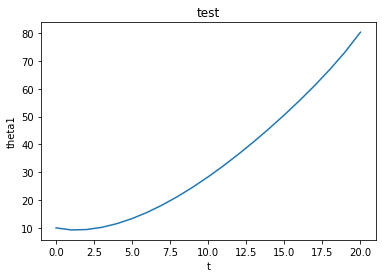

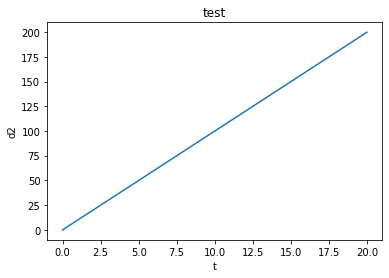

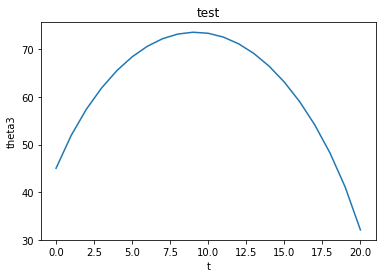

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


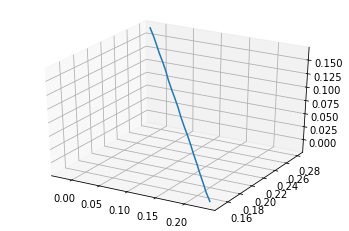

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from numpy import sin, cos, array, arange
from math import sqrt

def Jacobiano_inverso(theta1,theta3):
  JP = array([[(20*cos(theta1+theta3))/(3*sin(theta3)),(20*sin(theta1+theta3))/(3*sin(theta3)),0],
                                         [0,0,1],
                                         [-20*(cos(theta1+theta3)+cos(theta1))/(3*sin(theta3)),-20*(sin(theta1+theta3)+sin(theta1))/(3*sin(theta3)),0]])


  return JP

def Pe_punto(xi,yi,zi,xf,yf,zf,v):
  deltax = xf-xi
  deltay = yf-yi
  deltaz = zf-zi
  d = sqrt((deltax**2) + (deltay**2) + (deltaz**2))
  u = array([[deltax],[deltay],[deltaz]]) / d
  Pe_p = u * v
  return d, Pe_p

def deltaT(d,n,v):
  delta_t = (d)/(n*v)
  return delta_t

def cinematicaDiferencial(n,v,xi,yi,zi,xf,yf,zf,codo):
  d, Pe_p = Pe_punto(xi,yi,zi,xf,yf,zf,v)
  dt = deltaT(d,n,v)
  theta1, d2, theta3 =  inversa(xi,yi,zi,codo)
  qi = array([[deg2rad(theta1)],[d2],[deg2rad(theta3)]])
  print(qi)
  lista_q1 = [qi[0].item()]
  lista_q2 = [qi[1].item()]
  lista_q3 = [qi[2].item()]

  for i in range(n):
    JP = Jacobiano_inverso(qi[0].item(),qi[2].item())
    t1 = JP @ Pe_p
    t2 = t1*dt
    qi_1 = qi + t2
    qi = qi_1
    lista_q1.append(qi_1[0].item())
    lista_q2.append(qi_1[1].item())
    lista_q3.append(qi_1[2].item())
    # print(qi_1)
    # print(i)


  return rad2deg(lista_q1),lista_q2,rad2deg(lista_q3)

def grafica(n,y,ylabel):
  x = arange(0,n+1,1)
  plt.plot(x,y)
  plt.xlabel('t')
  plt.ylabel(ylabel)
  plt.title('test')
  plt.show()

def obtener_puntos_XYZ(n,lista_q1,lista_q2,lista_q3):
  posicionesX = []
  posicionesY = []
  posicionesZ = []
  for i in range(n):
    dh = dhParametros(lista_q1[i],lista_q2[i],lista_q3[i])
    x,y,z,e = cinematicaDirecta(dh)
    posicionesX.append(e[0,3]*1000)
    posicionesY.append(e[1,3]*1000)
    posicionesZ.append(e[2,3]*1000)
  # matrizA03_lista.append(e)

  return posicionesX,posicionesY,posicionesZ

def grafica3d(posicionesX,posicionesY,posicionesZ):
  # Creamos la figura
  fig = plt.figure()

  # Agrrgamos un plano 3D
  ax1 = fig.add_subplot(111,projection='3d')

  # Datos en array bi-dimensional
  x = array([posicionesX])
  y = array([posicionesY])
  z = array([posicionesZ])

  # plot_wireframe nos permite agregar los datos x, y, z. Por ello 3D
  # Es necesario que los datos esten contenidos en un array bi-dimensional
  ax1.plot_wireframe(x, y, z)

  # Mostramos el gráfico
  plt.show()



xi = 0.23372
yi = 0.14895
zi = -0.021
xf = -0.026047#0.1687
yf = 0.297721#0.2198 #30 0.1 45 #90 0.2 10
zf = 0.17925#0.079
n = 20
v = 2.0
codo = 2

lista_q1,lista_q2,lista_q3 = cinematicaDiferencial(n,v,xi,yi,zi,xf,yf,zf,codo)

# dh = dhParametros(lista_q1[0],lista_q2[0],lista_q3[0])
# x,y,z,e = cinematicaDirecta(dh)
# print(e)
# dh = dhParametros(lista_q1[-1],lista_q2[-1],lista_q3[-1])
# x,y,z,e = cinematicaDirecta(dh)
# print(e)

y1 = lista_q1
y2 = [i*1000 for i in lista_q2]
y3 = lista_q3
print(y1)
print(y2)
print(y3)
grafica(n,y1,'theta1')
grafica(n,y2,'d2')
grafica(n,y3,'theta3')

posicionesX,posicionesY,posicionesZ = obtener_puntos_XYZ(n,lista_q1,lista_q2,lista_q3)

grafica3d(posicionesX,posicionesY,posicionesZ)

# C.Diferencial antro

hola [32.50940459 35.2493215  38.12964643 41.1469052  44.29438404 47.56172916
 50.93470208 54.3951639  57.92135003 61.48846806 65.06960608 68.63688529
 72.16274222 75.62119624 78.98895825 82.24626653 85.37738716 88.37077326
 91.21892545 93.91802629 96.46743171]
[33.2199277  36.00395805 38.81079895 41.64488421 44.50740286 47.39549051
 50.30136079 53.21150325 56.10612492 58.95904736 61.73826429 64.40729314
 66.92730929 69.2598582  71.36975783 73.22770588 74.8121476  76.11013366
 77.11713952 77.83603561 78.27552371]
[-111.0992769  -113.94510298 -116.60468833 -119.0725244  -121.34083907
 -123.39983775 -125.23801089 -126.84254619 -128.19987591 -129.29637363
 -130.11918751 -130.65715982 -130.90174221 -130.84778442 -130.49406711
 -129.8434768  -128.90278139 -127.68204057 -126.19375151 -124.45186531
 -122.47080678]


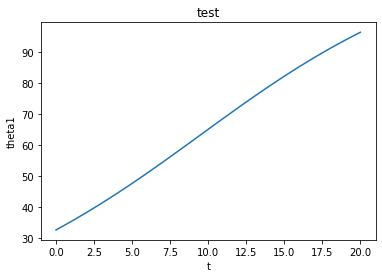

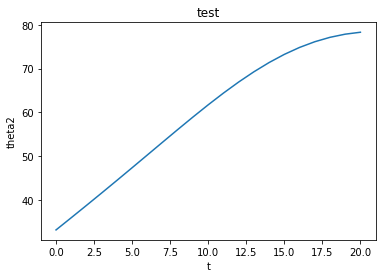

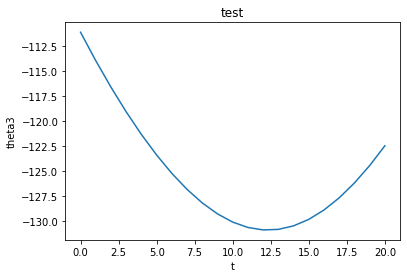

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


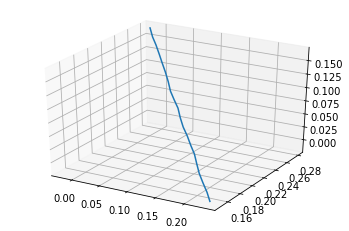

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from numpy import sin, cos, array, arange, rad2deg
from math import sqrt

def Jacobiano_inverso(theta1,theta2,theta3):
  JP = array([[-(140737488355328000000.0*sin(theta1))/(46614507943098318848.0*cos(theta2 + theta3) + 34925133635281485824.0*cos(theta2))
,(140737488355328000000.0*cos(theta1))/(46614507943098318848.0*cos(theta2 + theta3) + 34925133635281485824.0*cos(theta2))
,-8617.6857316493988037109375/(46614507943098318848.0*cos(theta2 + theta3) + 34925133635281485824.0*cos(theta2))
],
                                         [-(0.00000000000000000000000000000009933954693576639902588284339791*(7.083658658530511843273242592133e+50*cos(theta1 - 1.0*theta3) + 7.083658658530511843273242592133e+50*cos(2.0*theta2 - 1.0*theta1 + theta3) + 9.4545454357459441592920249131437e+50*cos(theta1 + 2.0*theta2 + 2.0*theta3) + 7.083658658530511843273242592133e+50*cos(theta1 + theta3) + 7.083658658530511843273242592133e+50*cos(theta1 + 2.0*theta2 + theta3) + 1.8909090871491888318584049826287e+51*cos(theta1) + 9.4545454357459441592920249131437e+50*cos(2.0*theta2 - 1.0*theta1 + 2.0*theta3)))/(34925133635281485824.0*sin(theta2 - 1.0*theta3) - 46614507943098318848.0*sin(theta2 + 2.0*theta3) - 34925133635281485824.0*sin(theta2 + theta3) + 46614507943098318848.0*sin(theta2))
,-(0.00000000000000000000000000000009933954693576639902588284339791*(7.083658658530511843273242592133e+50*sin(theta1 - 1.0*theta3) - 9.4545454357459441592920249131437e+50*sin(2.0*theta2 - 1.0*theta1 + 2.0*theta3) - 7.083658658530511843273242592133e+50*sin(2.0*theta2 - 1.0*theta1 + theta3) + 9.4545454357459441592920249131437e+50*sin(theta1 + 2.0*theta2 + 2.0*theta3) + 7.083658658530511843273242592133e+50*sin(theta1 + theta3) + 7.083658658530511843273242592133e+50*sin(theta1 + 2.0*theta2 + theta3) + 1.8909090871491888318584049826287e+51*sin(theta1)))/(34925133635281485824.0*sin(theta2 - 1.0*theta3) - 46614507943098318848.0*sin(theta2 + 2.0*theta3) - 34925133635281485824.0*sin(theta2 + theta3) + 46614507943098318848.0*sin(theta2))
,-(1.2244544518749042347063427860877e-63*(1.1493893312381564969569011399114e+83*sin(2.0*theta2 + theta3) + 1.1493893312381564969569011399114e+83*sin(theta3) + 1.5340877051530768393365394948255e+83*sin(2.0*theta2 + 2.0*theta3)))/(34925133635281485824.0*sin(theta2 - 1.0*theta3) - 46614507943098318848.0*sin(theta2 + 2.0*theta3) - 34925133635281485824.0*sin(theta2 + theta3) + 46614507943098318848.0*sin(theta2))
],
                                         [-(1.0655432323362086414424154313062e-51*(1.8909090871491888318584049826287e+51*cos(theta1 + theta2 + theta3) + 1.4167317317061023686546485184266e+51*cos(theta1 - 1.0*theta2) + 1.4167317317061023686546485184266e+51*cos(theta1 + theta2) + 1.8909090871491888318584049826287e+51*cos(theta2 - 1.0*theta1 + theta3)))/sin(theta3)
,-(1.0655432323362086414424154313062e-51*(1.8909090871491888318584049826287e+51*sin(theta1 + theta2 + theta3) + 1.4167317317061023686546485184266e+51*sin(theta1 - 1.0*theta2) + 1.4167317317061023686546485184266e+51*sin(theta1 + theta2) - 1.8909090871491888318584049826287e+51*sin(theta2 - 1.0*theta1 + theta3)))/sin(theta3)
,-(0.000000000000000000086447137154567845135015568304643*(46614507943098318848.0*sin(theta2 + theta3) + 34925133635281485824.0*sin(theta2)))/sin(theta3)
]])


  return JP

def Pe_punto(xi,yi,zi,xf,yf,zf,v):
  deltax = xf-xi
  deltay = yf-yi
  deltaz = zf-zi
  d = sqrt((deltax**2) + (deltay**2) + (deltaz**2))
  u = array([[deltax],[deltay],[deltaz]]) / d
  Pe_p = u * v
  return d, Pe_p

def deltaT(d,n,v):
  delta_t = (d)/(n*v)
  return delta_t

def cinematicaDiferencial(n,v,xi,yi,zi,xf,yf,zf,codo):
  d, Pe_p = Pe_punto(xi,yi,zi,xf,yf,zf,v)
  dt = deltaT(d,n,v)
  # theta1, theta2, theta3 =  inversaAntro(xi,yi,zi,codo)
  theta1, theta2, theta3 =  inversaAntro(xi,yi,zi)
  qi = array([[deg2rad(theta1)],[deg2rad(theta2)],[deg2rad(theta3)]])
  # print(qi)
  lista_q1 = [qi[0].item()]
  lista_q2 = [qi[1].item()]
  lista_q3 = [qi[2].item()]

  for i in range(n):
    JP = Jacobiano_inverso(qi[0].item(),qi[1].item(),qi[2].item())
    t1 = JP @ Pe_p
    t2 = t1*dt
    qi_1 = qi + t2
    qi = qi_1
    lista_q1.append(qi_1[0].item())
    lista_q2.append(qi_1[1].item())
    lista_q3.append(qi_1[2].item())
    # print(qi_1)
    # print(i)


  return rad2deg(lista_q1),rad2deg(lista_q2),rad2deg(lista_q3)

def grafica(n,y,ylabel):
  x = arange(0,n+1,1)
  plt.plot(x,y)
  plt.xlabel('t')
  plt.ylabel(ylabel)
  plt.title('test')
  plt.show()

def obtener_puntos_XYZ(n,lista_q1,lista_q2,lista_q3):
  posicionesX = []
  posicionesY = []
  posicionesZ = []
  for i in range(n):
    dh = dhParametrosa(lista_q1[i],lista_q2[i],lista_q3[i])
    x,y,z,e = cinematicaDirectaa(dh)
    posicionesX.append(e[0,3]*1000)
    posicionesY.append(e[1,3]*1000)
    posicionesZ.append(e[2,3]*1000)
  # matrizA03_lista.append(e)

  return posicionesX,posicionesY,posicionesZ

def grafica3d(posicionesX,posicionesY,posicionesZ):
  # Creamos la figura
  fig = plt.figure()

  # Agrrgamos un plano 3D
  ax1 = fig.add_subplot(111,projection='3d')

  # Datos en array bi-dimensional
  x = array([posicionesX])
  y = array([posicionesY])
  z = array([posicionesZ])

  # plot_wireframe nos permite agregar los datos x, y, z. Por ello 3D
  # Es necesario que los datos esten contenidos en un array bi-dimensional
  ax1.plot_wireframe(x, y, z)

  # Mostramos el gráfico
  plt.show()



xi = 0.23372
yi = 0.14895
zi = -0.021
xf = -0.026047#0.1687
yf = 0.297721#0.2198 #30 0.1 45 #90 0.2 10
zf = 0.17925#0.079
n = 20
v = 2.0
codo = 2

lista_q1,lista_q2,lista_q3 = cinematicaDiferencial(n,v,xi,yi,zi,xf,yf,zf,codo)

# dh = dhParametros(lista_q1[0],lista_q2[0],lista_q3[0])
# x,y,z,e = cinematicaDirecta(dh)
# print(e)
# dh = dhParametros(lista_q1[-1],lista_q2[-1],lista_q3[-1])
# x,y,z,e = cinematicaDirecta(dh)
# print(e)

y1 = lista_q1
y2 = lista_q2
y3 = lista_q3
print('hola',y1)
print(y2)
print(y3)
grafica(n,y1,'theta1')
grafica(n,y2,'theta2')
grafica(n,y3,'theta3')

posicionesX,posicionesY,posicionesZ = obtener_puntos_XYZ(n,lista_q1,lista_q2,lista_q3)

grafica3d(posicionesX,posicionesY,posicionesZ)

# trayectoria antro cuadratica

-1.5967225218700822 -0.9826774273889336


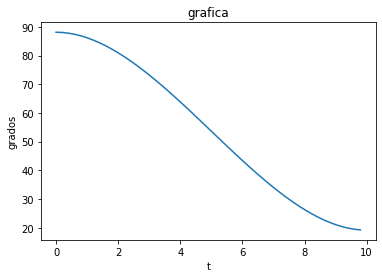

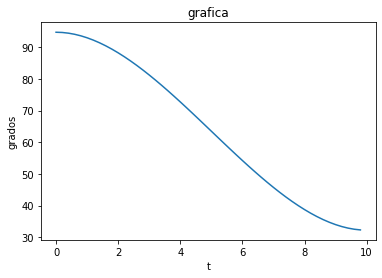

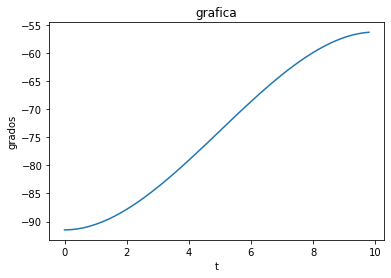

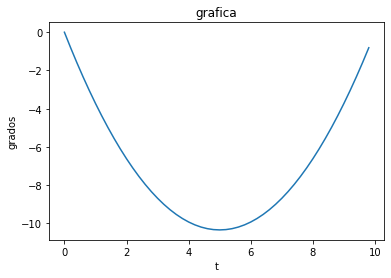

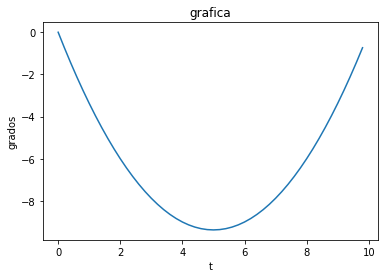

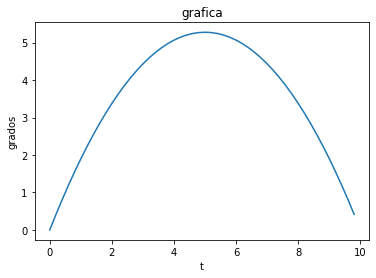

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


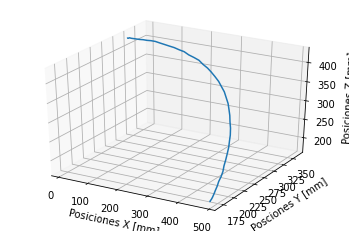

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from numpy import sin, cos, array, arange, rad2deg, deg2rad
from math import sqrt,pi


def cuadratica(tiempo_final,theta_inicial,theta_final,vel_inicial,vel_final):# tf,qi_,qip_,qf_,qfp_,n
  # print('aqui',tiempo_final,theta_inicial,theta_final,vel_inicial,vel_final)
  # valores de a0 a1 a2 y a3 obtenidos de matlab de acuerdo al sistema de ecuaciones(posicion, velocidad)
  a0 = theta_inicial
  a1 = vel_inicial
  a2 = -(3*theta_inicial-3*theta_final+vel_final*tiempo_final+2*vel_inicial*tiempo_final)/(tiempo_final**2)
  a3 = ((2*theta_inicial-2*theta_final+vel_final*tiempo_final+vel_inicial*tiempo_final)/(tiempo_final**3))
  # obtencion de thetas y velocidad evaluando los valores anteriores en las ecuaciones de posicion y velocidad para un tiempo de 0 hasta el tiempo ingresado por el usuario
  t = arange(0,tiempo_final,tiempo_final/50)
  posicion = a3*(t**3)+a2*(t**2)+a1*t+a0
  velocidad = 3*a3*(t**2)+2*a2*t+a1
  return posicion,velocidad

def grafica(tf,y):
  t = arange(0,tf,tf/50)
  plt.plot(t,y)
  plt.xlabel('t')
  plt.ylabel('grados')
  plt.title('grafica')
  plt.show()

def obtener_puntos_XYZ(lista_q1,lista_q2,lista_q3):
  posicionesX = []
  posicionesY = []
  posicionesZ = []
  for i in range(50):
    dh = dhParametrosa(lista_q1[i],lista_q2[i],lista_q3[i])
    x,y,z,e = cinematicaDirectaa(dh)
    posicionesX.append(e[0,3]*1000)
    posicionesY.append(e[1,3]*1000)
    posicionesZ.append(e[2,3]*1000)

  return posicionesX,posicionesY,posicionesZ

def grafica3d(posicionesX,posicionesY,posicionesZ):
  # Creamos la figura
  fig = plt.figure()

  # Agrrgamos un plano 3D
  ax1 = fig.add_subplot(111,projection='3d')

  # Datos en array bi-dimensional
  x = array([posicionesX])
  y = array([posicionesY])
  z = array([posicionesZ])

  # plot_wireframe nos permite agregar los datos x, y, z. Por ello 3D
  # Es necesario que los datos esten contenidos en un array bi-dimensional
  ax1.plot_wireframe(x, y, z)
  ax1.set_xlabel("Posiciones X [mm]" )
  ax1.set_ylabel("Posciones Y [mm]" )
  ax1.set_zlabel("Posiciones Z [mm]" )

  # Mostramos el gráfico
  plt.show()

xi = 0.0102
yi = 0.310
zi = 0.433
xf = 0.484#0.1687
yf = 0.168#0.2198 #30 0.1 45 #90 0.2 10
zf = 0.164#0.079
tf = 10


theta1, theta2, theta3 =  inversaAntro(xi,yi,zi) #Posiciones iniciales se utilizan para obtener thetas iniciales de cada articulacion(cinematica inversa)
theta1f, theta2f, theta3f =  inversaAntro(xf,yf,zf) #Posiciones Finales se utilizan para obtener thetas finales de cada articulacion

print(deg2rad(theta3),deg2rad(theta3f))

posicion1,velocidad1 = cuadratica(tf,deg2rad(theta1),deg2rad(theta1f),0,0)#Se ingresa tiempo final, theta 1 inicial y theta 1 final para obtener theta que describen la trayectoria para art 1
posicion2,velocidad2 = cuadratica(tf,deg2rad(theta2),deg2rad(theta2f),0,0)#Se ingresa tiempo final, theta 2 inicial y theta 2 final para obtener theta que describen la trayectoria para art 2
posicion3,velocidad3 = cuadratica(tf,deg2rad(theta3),deg2rad(theta3f),0,0)#Se ingresa tiempo final, theta 3 inicial y theta 3 final para obtener theta que describen la trayectoria para art 3

#grafica de taryectoria de posicion para cada artirculacion
grafica(tf,rad2deg(posicion1))
grafica(tf,rad2deg(posicion2))
grafica(tf,rad2deg(posicion3))

#grafica de velocidad para cada artirculacion
grafica(tf,rad2deg(velocidad1))
grafica(tf,rad2deg(velocidad2))
grafica(tf,rad2deg(velocidad3))

#se obtienen los puntos necesarios para la grafica 3d apartir de los thetas con cinematica directa
posicionesX,posicionesY,posicionesZ = obtener_puntos_XYZ(rad2deg(posicion1),rad2deg(posicion2),rad2deg(posicion3))

#se realiza la grafica 3d
grafica3d(posicionesX,posicionesY,posicionesZ)





# Cuadratica Scara

-42.36505551855367 95.721199809938
-49.48017557008871 -94.28973086988131
0.01475 0.18975
[14.75, 14.957199999999998, 15.567599999999999, 16.5644, 17.9308, 19.650000000000002, 21.7052, 24.0796, 26.756400000000003, 29.7188, 32.95, 36.4332, 40.15160000000001, 44.08840000000001, 48.226800000000004, 52.55, 57.04120000000002, 61.68360000000001, 66.4604, 71.35480000000001, 76.35, 81.42920000000001, 86.57560000000002, 91.77240000000002, 97.00280000000001, 102.25000000000001, 107.49720000000003, 112.72760000000002, 117.92440000000002, 123.07080000000002, 128.14999999999998, 133.14520000000002, 138.03960000000004, 142.81640000000002, 147.4588, 151.95000000000002, 156.2732, 160.4116, 164.3484, 168.06680000000003, 171.55000000000004, 174.78120000000007, 177.74360000000001, 180.42039999999997, 182.79480000000004, 184.85000000000002, 186.5692, 187.93560000000002, 188.9324, 189.54280000000006]


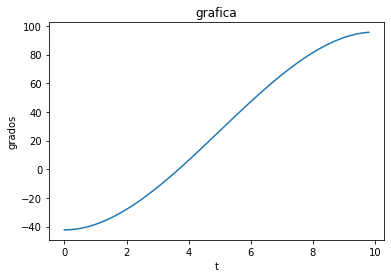

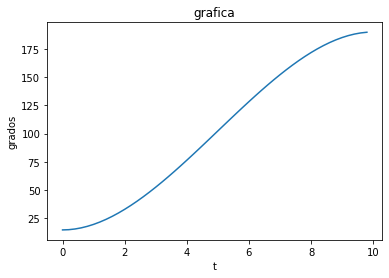

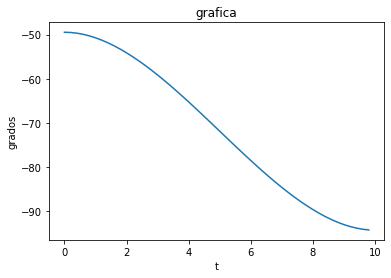

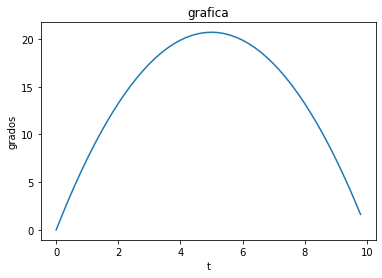

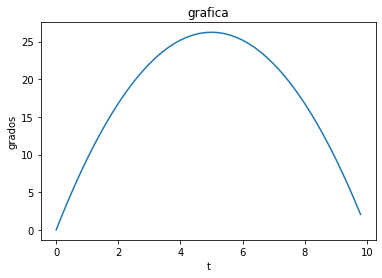

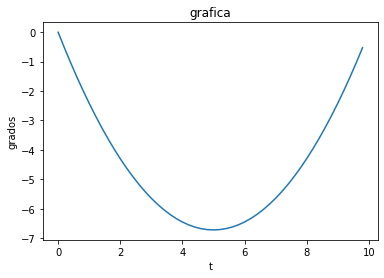

/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:304: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self._segments3d = np.asanyarray(segments)


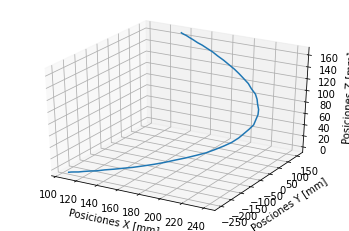

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from numpy import sin, cos, array, arange, rad2deg, deg2rad
from math import sqrt,pi


def cuadratica(tiempo_final,theta_inicial,theta_final,vel_inicial,vel_final):# tf,qi_,qip_,qf_,qfp_,n
  # print('aqui',tiempo_final,theta_inicial,theta_final,vel_inicial,vel_final)
  a0 = theta_inicial
  a1 = vel_inicial
  a2 = -(3*theta_inicial-3*theta_final+vel_final*tiempo_final+2*vel_inicial*tiempo_final)/(tiempo_final**2)
  a3 = ((2*theta_inicial-2*theta_final+vel_final*tiempo_final+vel_inicial*tiempo_final)/(tiempo_final**3))
  t = arange(0,tiempo_final,tiempo_final/50)
  posicion = a3*(t**3)+a2*(t**2)+a1*t+a0
  velocidad = 3*a3*(t**2)+2*a2*t+a1
  return posicion,velocidad

def grafica(tf,y):
  t = arange(0,tf,tf/50)
  plt.plot(t,y)
  plt.xlabel('t')
  plt.ylabel('grados')
  plt.title('grafica')
  plt.show()

def obtener_puntos_XYZ(lista_q1,lista_q2,lista_q3):
  posicionesX = []
  posicionesY = []
  posicionesZ = []
  for i in range(50):
    dh = dhParametros(lista_q1[i],lista_q2[i],lista_q3[i])
    x,y,z,e = cinematicaDirecta(dh)
    posicionesX.append(e[0,3]*1000)
    posicionesY.append(e[1,3]*1000)
    posicionesZ.append(e[2,3]*1000)

  return posicionesX,posicionesY,posicionesZ

def grafica3d(posicionesX,posicionesY,posicionesZ):
  # Creamos la figura
  fig = plt.figure()

  # Agrrgamos un plano 3D
  ax1 = fig.add_subplot(111,projection='3d')

  # Datos en array bi-dimensional
  x = array([posicionesX])
  y = array([posicionesY])
  z = array([posicionesZ])

  # plot_wireframe nos permite agregar los datos x, y, z. Por ello 3D
  # Es necesario que los datos esten contenidos en un array bi-dimensional
  ax1.plot_wireframe(x, y, z)
  ax1.set_xlabel("Posiciones X [mm]" )
  ax1.set_ylabel("Posciones Y [mm]" )
  ax1.set_zlabel("Posiciones Z [mm]" )

  # Mostramos el gráfico
  plt.show()

xi = 0.106
yi = -0.251
zi = -0.006
xf = 0.135#0.1687
yf = 0.153#0.2198 #30 0.1 45 #90 0.2 10
zf = 0.169#0.079
tf = 10
codo = 1

theta1, d2, theta3 =  inversa(xi,yi,zi,codo)
theta1f, d2f, theta3f =  inversa(xf,yf,zf,codo)

print(theta1,theta1f)
print(theta3,theta3f)
print(d2,d2f)

posicion1,velocidad1 = cuadratica(tf,deg2rad(theta1),deg2rad(theta1f),0,0)
posicion2,velocidad2 = cuadratica(tf,d2,d2f,0,0)
posicion3,velocidad3 = cuadratica(tf,deg2rad(theta3),deg2rad(theta3f),0,0)

# print(posicion1)

d2s = [desplazamiento*1000 for desplazamiento in posicion2]
v2s = [desplazamiento*1000 for desplazamiento in velocidad2]
print(d2s)
# print(posicion3)

grafica(tf,rad2deg(posicion1))
grafica(tf,d2s)
grafica(tf,rad2deg(posicion3))

grafica(tf,rad2deg(velocidad1))
grafica(tf,v2s)
grafica(tf,rad2deg(velocidad3))

posicionesX,posicionesY,posicionesZ = obtener_puntos_XYZ(rad2deg(posicion1),posicion2,rad2deg(posicion3))
# print(posicionesX)
# print(posicionesY)
# print(posicionesZ)

grafica3d(posicionesX,posicionesY,posicionesZ)

# Trapezoidal tipo 2 antro

intentar con un valor ,mayor o igual a: 4.365081030870803
4.365081030870803


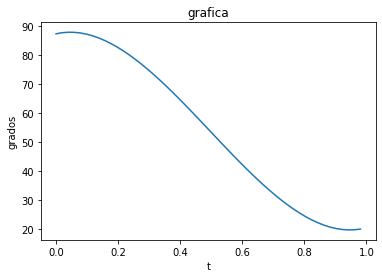

TypeError: ignored

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from numpy import sin, cos, array, arange, rad2deg, deg2rad, sign, polyfit, polyval
from math import sqrt,pi


def TrapezoidalTipo2(tiempo_final,theta_inicial,theta_final,aceleracion):# tf,qi_,qip_,qf_,qfp_,n
  posicion = []
  velocidad = []
  if abs(aceleracion) >= (4*abs(theta_final-theta_inicial))/tiempo_final**2:

    if sign(theta_final-theta_inicial) != 1:
      aceleracion = aceleracion*-1

    tc = tiempo_final/2 -1/2*sqrt((tiempo_final**2*aceleracion-4*(theta_final-theta_inicial))/(aceleracion))

    t1 = arange(0,tc,tiempo_final/50)
    eqn1 = theta_inicial + 1/2*aceleracion*t1**2
    vel1 = aceleracion*t1

    t2 = arange(tc,tiempo_final-tc,tiempo_final/50)
    eqn2 = theta_inicial + aceleracion*tc*(t2-(tc/2))
    vel2 = [1]*len(eqn2)
    vel2 = [num * (aceleracion*tc) for num in vel2]

    t3 = arange(tiempo_final-tc,tiempo_final,tiempo_final/50)
    eqn3 = theta_final - 1/2*aceleracion*(tiempo_final-t3)**2
    vel3 = -((aceleracion*(2*t3-2*tiempo_final))/2)

    eqn1 = eqn1.tolist()
    eqn2 = eqn2.tolist()
    eqn3 = eqn3.tolist()

    posicion = eqn1 + eqn2 + eqn3
    t = arange(0,tiempo_final,tiempo_final/(len(posicion)))
    p = polyfit(t,posicion,3)
    posicion = polyval(p,t)

    vel1 = vel1.tolist()
    vel3 = vel3.tolist()

    velocidad = vel1 + vel2 + vel3
    return posicion,velocidad

  else:
    print('intentar con un valor ,mayor o igual a:' ,(4*abs(theta_final-theta_inicial))/tf**2)
    return 'mal',(4*abs(theta_final-theta_inicial))/tf**2)



def grafica(tf,y):
  t = arange(0,tf,tf/(len(y)))
  plt.plot(t,y)
  plt.xlabel('t')
  plt.ylabel('grados')
  plt.title('grafica')
  plt.show()

def obtener_puntos_XYZ(lista_q1,lista_q2,lista_q3):
  posicionesX = []
  posicionesY = []
  posicionesZ = []
  for i in range(50):
    dh = dhParametrosa(lista_q1[i],lista_q2[i],lista_q3[i])
    x,y,z,e = cinematicaDirectaa(dh)
    posicionesX.append(e[0,3]*1000)
    posicionesY.append(e[1,3]*1000)
    posicionesZ.append(e[2,3]*1000)

  return posicionesX,posicionesY,posicionesZ

def grafica3d(posicionesX,posicionesY,posicionesZ):
  # Creamos la figura
  fig = plt.figure()

  # Agrrgamos un plano 3D
  ax1 = fig.add_subplot(111,projection='3d')

  # Datos en array bi-dimensional
  x = array([posicionesX])
  y = array([posicionesY])
  z = array([posicionesZ])

  # plot_wireframe nos permite agregar los datos x, y, z. Por ello 3D
  # Es necesario que los datos esten contenidos en un array bi-dimensional
  ax1.plot_wireframe(x, y, z)
  ax1.set_xlabel("Posiciones X [mm]" )
  ax1.set_ylabel("Posciones Y [mm]" )
  ax1.set_zlabel("Posiciones Z [mm]" )

  # Mostramos el gráfico
  plt.show()

xi = 0.0102
yi = 0.310
zi = 0.433
xf = 0.484#0.1687
yf = 0.168#0.2198 #30 0.1 45 #90 0.2 10
zf = 0.164#0.079
tf = 1


theta1, theta2, theta3 =  inversaAntro(xi,yi,zi)
theta1f, theta2f, theta3f =  inversaAntro(xf,yf,zf)

# print(deg2rad(theta3),deg2rad(theta3f))

posicion1,velocidad1 = TrapezoidalTipo2(tf,deg2rad(theta1),deg2rad(theta1f),4.9)
posicion2,velocidad2 = TrapezoidalTipo2(tf,deg2rad(theta2),deg2rad(theta2f),4.4)
posicion3,velocidad3 = TrapezoidalTipo2(tf,deg2rad(theta3),deg2rad(theta3f),2.5)

grafica(tf,rad2deg(posicion1))
grafica(tf,rad2deg(posicion2))
grafica(tf,rad2deg(posicion3))

grafica(tf,rad2deg(velocidad1))
grafica(tf,rad2deg(velocidad2))
grafica(tf,rad2deg(velocidad3))

posicionesX,posicionesY,posicionesZ = obtener_puntos_XYZ(rad2deg(posicion1),rad2deg(posicion2),rad2deg(posicion3))

grafica3d(posicionesX,posicionesY,posicionesZ)

## Prueba TEST

[1, 1, 1, 1, 1, 1, 1]
[-2.1277669612141272, -2.1277669612141272, -2.1277669612141272, -2.1277669612141272, -2.1277669612141272, -2.1277669612141272, -2.1277669612141272]
51
[1.5379049672030753, 1.5369249672030754, 1.5339849672030754, 1.5290849672030753, 1.5222249672030754, 1.5134049672030754, 1.5026249672030754, 1.4898849672030754, 1.4751849672030752, 1.4585249672030753, 1.4399049672030753, 1.4193249672030754, 1.3967849672030754, 1.3722849672030752, 1.3458249672030753, 1.3174049672030754, 1.2870249672030754, 1.2546849672030753, 1.2203849672030753, 1.1841249672030754, 1.1459049672030752, 1.1057249672030753, 1.075926167077116, 1.0333708278528335, 0.990815488628551, 0.9482601494042684, 0.9057048101799858, 0.8631494709557033, 0.8205941317314206, 0.7960744063668259, 0.7544990671425433, 0.7148837279182607, 0.6772283886939781, 0.6415330494696956, 0.6077977102454131, 0.5760223710211305, 0.5462070317968479, 0.5183516925725653, 0.49245635334828286, 0.46852101412400027, 0.44654567489971775, 0.426

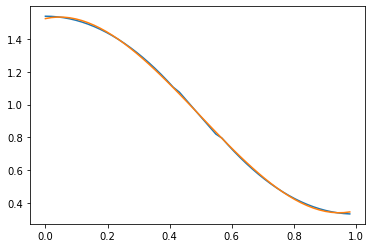

In [ ]:
from numpy import polyfit, polyval
xi = 0.0102
yi = 0.310
zi = 0.433
xf = 0.484#0.1687
yf = 0.168#0.2198 #30 0.1 45 #90 0.2 10
zf = 0.164#0.079
tiempo_final = 1
aceleracion = 4.9

theta1, theta2, theta3 =  inversaAntro(xi,yi,zi)
theta1f, theta2f, theta3f =  inversaAntro(xf,yf,zf)

theta_inicial = deg2rad(theta1)
theta_final = deg2rad(theta1f)

if abs(aceleracion) >= (4*abs(theta_final-theta_inicial))/tf**2:

    if sign(theta_final-theta_inicial) != 1:
      aceleracion = aceleracion*-1

    tc = tiempo_final/2 -1/2*sqrt((tiempo_final**2*aceleracion-4*(theta_final-theta_inicial))/(aceleracion))

    t1 = arange(0,tc,tiempo_final/50)
    eqn1 = theta_inicial + 1/2*aceleracion*t1**2
    vel1 = aceleracion*t1

    t2 = arange(tc,tiempo_final-tc,tiempo_final/50)
    eqn2 = theta_inicial + aceleracion*tc*(t2-(tc/2))
    vel2 = [1]*len(eqn2)
    print(vel2)
    vel2 = [num * (aceleracion*tc) for num in vel2]
    print(ee)

    t3 = arange(tiempo_final-tc,tiempo_final,tiempo_final/50)
    eqn3 = theta_final - 1/2*aceleracion*(tiempo_final-t3)**2
    vel3 = -((aceleracion*(2*t3-2*tiempo_final))/2)

    eqn1 = eqn1.tolist()
    eqn2 = eqn2.tolist()
    eqn3 = eqn3.tolist()

    posicion = eqn1 + eqn2 + eqn3

    vel1 = vel1.tolist()
    vel3 = vel3.tolist()

    velocidad = vel1 + vel2 + vel3

    print(posicion)
    t = arange(0,tiempo_final,tiempo_final/(len(posicion)))
    # plt.plot(t1,eqn1,t2,eqn2,t3,eqn3)

    plt.plot(t,posicion)

    p = polyfit(t,posicion,3)
    # print(p)
    posicion = polyval(p,t)
    # print(posicion)

    plt.plot(t,posicion)

    # plt.plot(t,velocidad)





    # plt.plot(t1,eqn1,t2,eqn2,t3,eqn3)
    # plt.xlabel('t')
    # plt.ylabel('grados')
    # plt.title('grafica')
    # plt.show()

    # t = arange(0,tiempo_final,tiempo_final/(len(posicion)))
    # print(len(t),len(posicion))
    # plt.plot(t,posicion)
else:
  print('intentar con un valor ,mayor o igual a:' ,(4*abs(theta_final-theta_inicial))/tf**2)

# Trapezoidal Tipo 2 scara

14.75 189.75


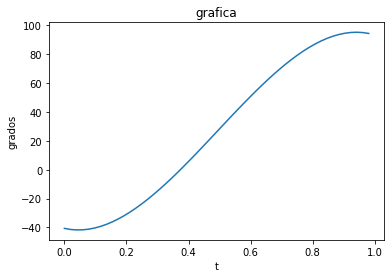

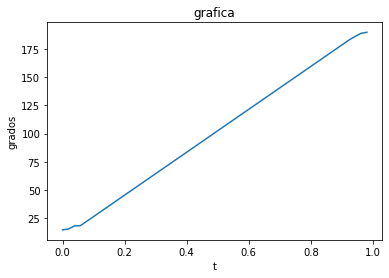

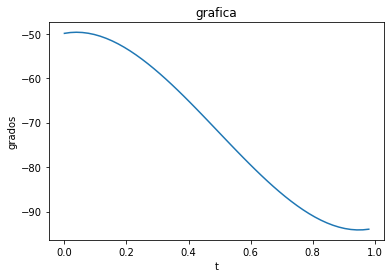

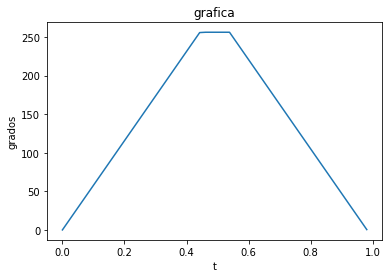

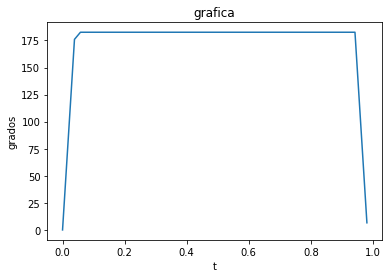

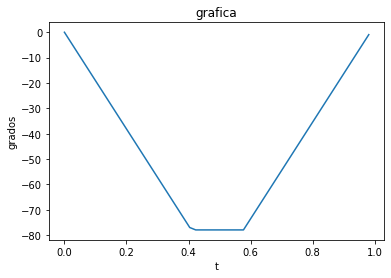

/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:304: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self._segments3d = np.asanyarray(segments)


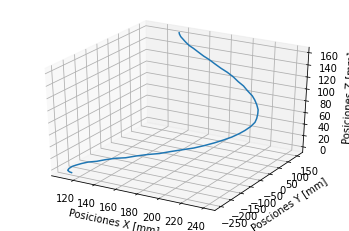

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from numpy import sin, cos, array, arange, rad2deg, deg2rad, sign, polyfit, polyval
from math import sqrt,pi


def TrapezoidalTipo2(tiempo_final,theta_inicial,theta_final,aceleracion,condicion='desplazamiento'):# tf,qi_,qip_,qf_,qfp_,n
  posicion = []
  velocidad = []
  if abs(aceleracion) >= (4*abs(theta_final-theta_inicial))/tiempo_final**2:

    if sign(theta_final-theta_inicial) != 1:
      aceleracion = aceleracion*-1

    tc = tiempo_final/2 -1/2*sqrt((tiempo_final**2*aceleracion-4*(theta_final-theta_inicial))/(aceleracion))

    t1 = arange(0,tc,tiempo_final/50)
    eqn1 = theta_inicial + 1/2*aceleracion*t1**2
    vel1 = aceleracion*t1

    t2 = arange(tc,tiempo_final-tc,tiempo_final/50)
    eqn2 = theta_inicial + aceleracion*tc*(t2-(tc/2))
    vel2 = [1]*len(eqn2)
    vel2 = [num * (aceleracion*tc) for num in vel2]

    t3 = arange(tiempo_final-tc,tiempo_final,tiempo_final/50)
    eqn3 = theta_final - 1/2*aceleracion*(tiempo_final-t3)**2
    vel3 = -((aceleracion*(2*t3-2*tiempo_final))/2)

    eqn1 = eqn1.tolist()
    eqn2 = eqn2.tolist()
    eqn3 = eqn3.tolist()

    posicion = eqn1 + eqn2 + eqn3
    # print(posicion)
    if condicion == 'angulo':
      t = arange(0,tiempo_final,tiempo_final/(len(posicion)))
      p = polyfit(t,posicion,3)
      posicion = polyval(p,t)
      posicion = posicion.tolist()

    vel1 = vel1.tolist()
    vel3 = vel3.tolist()

    velocidad = vel1 + vel2 + vel3

  else:
    print('intentar con un valor ,mayor o igual a:' ,(4*abs(theta_final-theta_inicial))/tf**2)

  return posicion,velocidad

def grafica(tf,y):
  t = arange(0,tf,tf/(len(y)))
  plt.plot(t,y)
  plt.xlabel('t')
  plt.ylabel('grados')
  plt.title('grafica')
  plt.show()

def obtener_puntos_XYZ(lista_q1,lista_q2,lista_q3):
  posicionesX = []
  posicionesY = []
  posicionesZ = []
  for i in range(50):
    dh = dhParametros(lista_q1[i],lista_q2[i],lista_q3[i])
    x,y,z,e = cinematicaDirecta(dh)
    posicionesX.append(e[0,3]*1000)
    posicionesY.append(e[1,3]*1000)
    posicionesZ.append(e[2,3]*1000)

  return posicionesX,posicionesY,posicionesZ

def grafica3d(posicionesX,posicionesY,posicionesZ):
  # Creamos la figura
  fig = plt.figure()

  # Agrrgamos un plano 3D
  ax1 = fig.add_subplot(111,projection='3d')

  # Datos en array bi-dimensional
  x = array([posicionesX])
  y = array([posicionesY])
  z = array([posicionesZ])

  # plot_wireframe nos permite agregar los datos x, y, z. Por ello 3D
  # Es necesario que los datos esten contenidos en un array bi-dimensional
  ax1.plot_wireframe(x, y, z)
  ax1.set_xlabel("Posiciones X [mm]" )
  ax1.set_ylabel("Posciones Y [mm]" )
  ax1.set_zlabel("Posiciones Z [mm]" )

  # Mostramos el gráfico
  plt.show()

xi = 0.106
yi = -0.251
zi = -0.006
xf = 0.135#0.1687
yf = 0.153#0.2198 #30 0.1 45 #90 0.2 10
zf = 0.169#0.079
tf = 1
codo = 1

theta1, d2, theta3 =  inversa(xi,yi,zi,codo)
theta1f, d2f, theta3f =  inversa(xf,yf,zf,codo)

print(d2*1000,d2f*1000)
# print(theta3,theta3f)

posicion1,velocidad1 = TrapezoidalTipo2(tf,deg2rad(theta1),deg2rad(theta1f),9.7,'angulo')
posicion2,velocidad2 = TrapezoidalTipo2(tf,d2,d2f,4.4)
posicion3,velocidad3 = TrapezoidalTipo2(tf,deg2rad(theta3),deg2rad(theta3f),3.2,'angulo')
# print(rad2deg(posicion3))
d2s = [desplazamiento*1000 for desplazamiento in posicion2]
# print(type(posicion1))
# print(type(posicion2))
v2s = [desplazamiento*1000 for desplazamiento in velocidad2]

grafica(tf,rad2deg(posicion1))
grafica(tf,d2s)
grafica(tf,rad2deg(posicion3))

grafica(tf,rad2deg(velocidad1))
grafica(tf,v2s)
grafica(tf,rad2deg(velocidad3))

posicionesX,posicionesY,posicionesZ = obtener_puntos_XYZ(rad2deg(posicion1),posicion2,rad2deg(posicion3))

grafica3d(posicionesX,posicionesY,posicionesZ)

# Trapezoidal Tipo 1 Antro

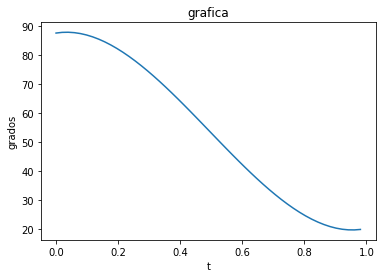

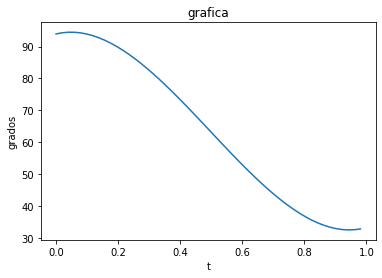

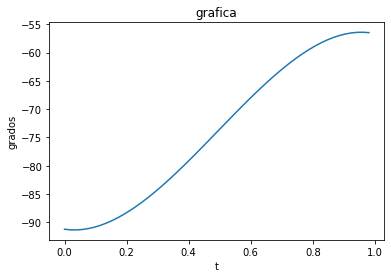

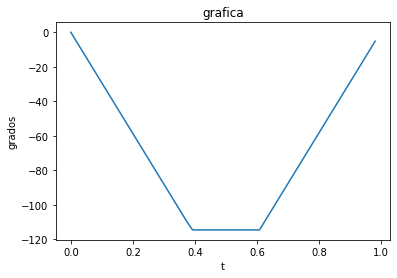

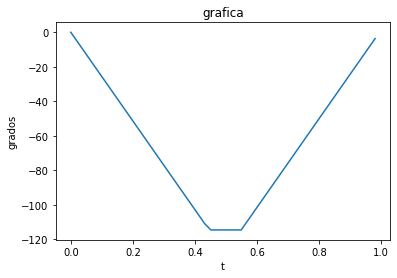

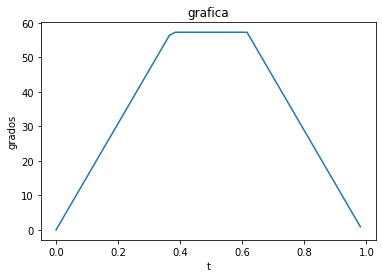

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


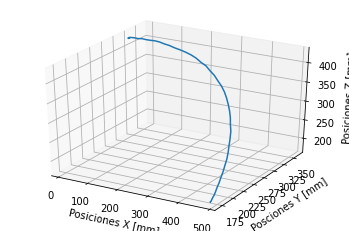

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from numpy import sin, cos, array, arange, rad2deg, deg2rad, sign, polyfit, polyval
from math import sqrt,pi


def TrapezoidalTipo1(tiempo_final,theta_inicial,theta_final,vel):# tf,qi_,qip_,qf_,qfp_,n
  posicion = []
  velocidad = []
  if abs(vel) > (abs(theta_final-theta_inicial))/tiempo_final and abs(vel) <= (2*abs(theta_final-theta_inicial))/tiempo_final:

    if sign(theta_final-theta_inicial) != 1:
      vel = vel*-1

    tc = (theta_inicial-theta_final+vel*tiempo_final)/(vel)
    aceleracion = (vel**2)/(theta_inicial-theta_final+vel*tiempo_final)

    t1 = arange(0,tc,tiempo_final/50)
    eqn1 = theta_inicial + 1/2*aceleracion*t1**2
    vel1 = aceleracion*t1

    t2 = arange(tc,tiempo_final-tc,tiempo_final/50)
    eqn2 = theta_inicial + aceleracion*tc*(t2-(tc/2))
    vel2 = [1]*len(eqn2)
    vel2 = [num * (aceleracion*tc) for num in vel2]

    t3 = arange(tiempo_final-tc,tiempo_final,tiempo_final/50)
    eqn3 = theta_final - 1/2*aceleracion*(tiempo_final-t3)**2
    vel3 = -((aceleracion*(2*t3-2*tiempo_final))/2)

    eqn1 = eqn1.tolist()
    eqn2 = eqn2.tolist()
    eqn3 = eqn3.tolist()

    posicion = eqn1 + eqn2 + eqn3
    t = arange(0,tiempo_final,tiempo_final/(len(posicion)))
    p = polyfit(t,posicion,3)
    posicion = polyval(p,t)

    vel1 = vel1.tolist()
    vel3 = vel3.tolist()

    velocidad = vel1 + vel2 + vel3

  else:
    print('intentar con un valor ,mayor o igual a:' ,(abs(theta_final-theta_inicial))/tiempo_final, 'y menor a: ', (2*abs(theta_final-theta_inicial))/tiempo_final)

  return posicion,velocidad

def grafica(tf,y):
  t = arange(0,tf,tf/(len(y)))
  plt.plot(t,y)
  plt.xlabel('t')
  plt.ylabel('grados')
  plt.title('grafica')
  plt.show()

def obtener_puntos_XYZ(lista_q1,lista_q2,lista_q3):
  posicionesX = []
  posicionesY = []
  posicionesZ = []
  for i in range(50):
    dh = dhParametrosa(lista_q1[i],lista_q2[i],lista_q3[i])
    x,y,z,e = cinematicaDirectaa(dh)
    posicionesX.append(e[0,3]*1000)
    posicionesY.append(e[1,3]*1000)
    posicionesZ.append(e[2,3]*1000)

  return posicionesX,posicionesY,posicionesZ

def grafica3d(posicionesX,posicionesY,posicionesZ):
  # Creamos la figura
  fig = plt.figure()

  # Agrrgamos un plano 3D
  ax1 = fig.add_subplot(111,projection='3d')

  # Datos en array bi-dimensional
  x = array([posicionesX])
  y = array([posicionesY])
  z = array([posicionesZ])

  # plot_wireframe nos permite agregar los datos x, y, z. Por ello 3D
  # Es necesario que los datos esten contenidos en un array bi-dimensional
  ax1.plot_wireframe(x, y, z)
  ax1.set_xlabel("Posiciones X [mm]" )
  ax1.set_ylabel("Posciones Y [mm]" )
  ax1.set_zlabel("Posiciones Z [mm]" )

  # Mostramos el gráfico
  plt.show()

xi = 0.0102
yi = 0.310
zi = 0.433
xf = 0.484#0.1687
yf = 0.168#0.2198 #30 0.1 45 #90 0.2 10
zf = 0.164#0.079
tf = 1


theta1, theta2, theta3 =  inversaAntro(xi,yi,zi)
theta1f, theta2f, theta3f =  inversaAntro(xf,yf,zf)

# print(deg2rad(theta3),deg2rad(theta3f))

posicion1,velocidad1 = TrapezoidalTipo1(tf,deg2rad(theta1),deg2rad(theta1f),2)
posicion2,velocidad2 = TrapezoidalTipo1(tf,deg2rad(theta2),deg2rad(theta2f),2)
posicion3,velocidad3 = TrapezoidalTipo1(tf,deg2rad(theta3),deg2rad(theta3f),1)

grafica(tf,rad2deg(posicion1))
grafica(tf,rad2deg(posicion2))
grafica(tf,rad2deg(posicion3))

grafica(tf,rad2deg(velocidad1))
grafica(tf,rad2deg(velocidad2))
grafica(tf,rad2deg(velocidad3))

posicionesX,posicionesY,posicionesZ = obtener_puntos_XYZ(rad2deg(posicion1),rad2deg(posicion2),rad2deg(posicion3))

grafica3d(posicionesX,posicionesY,posicionesZ)

# Trapezoidal Tipo 1 Scara

-42.36505551855367 95.721199809938
-49.48017557008871 -94.28973086988131
[-42.36505552 -41.56875164 -39.78845879 -36.92366982 -34.05888084
 -31.19409186 -28.32930289 -25.46451391 -22.59972494 -19.73493596
 -16.87014699 -14.00535801 -11.14056903  -8.27578006  -5.41099108
  -2.54620211   0.31858687   3.18337584   6.04816482   8.91295379
  11.77774277  14.64253175  17.50732072  20.3721097   23.23689867
  26.10168765  28.96647662  31.8312656   34.69605458  37.56084355
  40.42563253  43.2904215   46.15521048  49.01999945  51.88478843
  54.74957741  57.61436638  60.47915536  63.34394433  66.20873331
  69.07352228  71.93831126  74.80310023  77.66788921  80.53267819
  83.39746716  86.26225614  89.12704511  91.99183409  93.14460308
  95.21308818]
[-48.78286627 -49.12739887 -49.54220305 -50.02434336 -50.57088431
 -51.17889044 -51.84542628 -52.56755636 -53.34234521 -54.16685736
 -55.03815734 -55.95330968 -56.90937891 -57.90342956 -58.93252616
 -59.99373324 -61.08411533 -62.20073697 -63.34066267 -

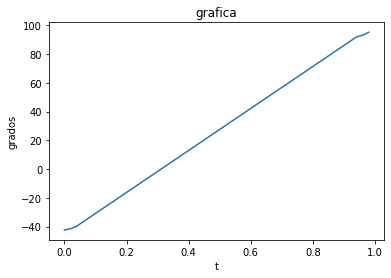

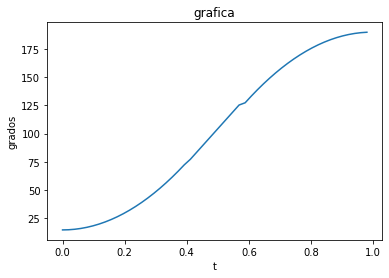

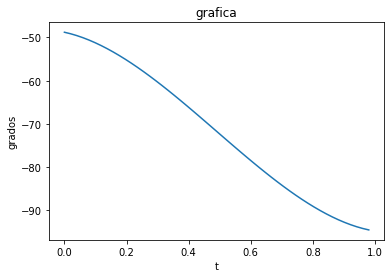

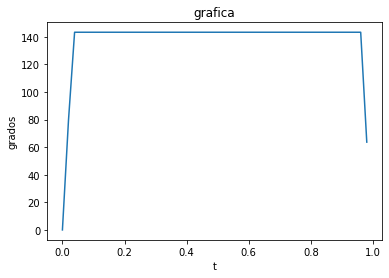

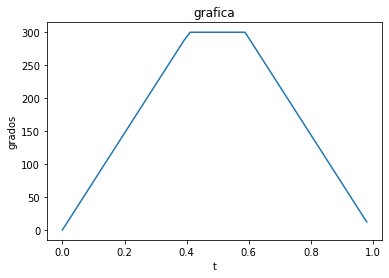

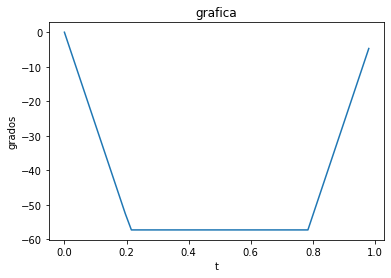

/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:304: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self._segments3d = np.asanyarray(segments)


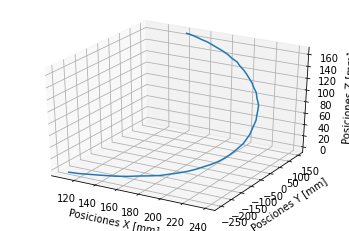

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from numpy import sin, cos, array, arange, rad2deg, deg2rad, sign, polyfit, polyval
from math import sqrt,pi


def TrapezoidalTipo1(tiempo_final,theta_inicial,theta_final,vel,condicion='desplazamiento'):# tf,qi_,qip_,qf_,qfp_,n
  posicion = []
  velocidad = []
  if abs(vel) > (abs(theta_final-theta_inicial))/tiempo_final and abs(vel) <= (2*abs(theta_final-theta_inicial))/tiempo_final:

    if sign(theta_final-theta_inicial) != 1:
      vel = vel*-1

    tc = (theta_inicial-theta_final+vel*tiempo_final)/(vel)
    aceleracion = (vel**2)/(theta_inicial-theta_final+vel*tiempo_final)

    t1 = arange(0,tc,tiempo_final/50)
    eqn1 = theta_inicial + 1/2*aceleracion*t1**2
    vel1 = aceleracion*t1

    t2 = arange(tc,tiempo_final-tc,tiempo_final/50)
    eqn2 = theta_inicial + aceleracion*tc*(t2-(tc/2))
    vel2 = [1]*len(eqn2)
    vel2 = [num * (aceleracion*tc) for num in vel2]

    t3 = arange(tiempo_final-tc,tiempo_final,tiempo_final/50)
    eqn3 = theta_final - 1/2*aceleracion*(tiempo_final-t3)**2
    vel3 = -((aceleracion*(2*t3-2*tiempo_final))/2)

    eqn1 = eqn1.tolist()
    eqn2 = eqn2.tolist()
    eqn3 = eqn3.tolist()

    posicion = eqn1 + eqn2 + eqn3
    if condicion == 'angulo':
      t = arange(0,tiempo_final,tiempo_final/(len(posicion)))
      p = polyfit(t,posicion,3)
      posicion = polyval(p,t)

    vel1 = vel1.tolist()
    vel3 = vel3.tolist()

    velocidad = vel1 + vel2 + vel3

  else:
    print('intentar con un valor ,mayor o igual a:' ,(abs(theta_final-theta_inicial))/tiempo_final, 'y menor a: ', (2*abs(theta_final-theta_inicial))/tiempo_final)

  return posicion,velocidad

def grafica(tf,y):
  t = arange(0,tf,tf/(len(y)))
  plt.plot(t,y)
  plt.xlabel('t')
  plt.ylabel('grados')
  plt.title('grafica')
  plt.show()

def obtener_puntos_XYZ(lista_q1,lista_q2,lista_q3):
  posicionesX = []
  posicionesY = []
  posicionesZ = []
  for i in range(50):
    dh = dhParametros(lista_q1[i],lista_q2[i],lista_q3[i])
    x,y,z,e = cinematicaDirectaa(dh)
    posicionesX.append(e[0,3]*1000)
    posicionesY.append(e[1,3]*1000)
    posicionesZ.append(e[2,3]*1000)

  return posicionesX,posicionesY,posicionesZ

def grafica3d(posicionesX,posicionesY,posicionesZ):
  # Creamos la figura
  fig = plt.figure()

  # Agrrgamos un plano 3D
  ax1 = fig.add_subplot(111,projection='3d')

  # Datos en array bi-dimensional
  x = array([posicionesX])
  y = array([posicionesY])
  z = array([posicionesZ])

  # plot_wireframe nos permite agregar los datos x, y, z. Por ello 3D
  # Es necesario que los datos esten contenidos en un array bi-dimensional
  ax1.plot_wireframe(x, y, z)
  ax1.set_xlabel("Posiciones X [mm]" )
  ax1.set_ylabel("Posciones Y [mm]" )
  ax1.set_zlabel("Posiciones Z [mm]" )

  # Mostramos el gráfico
  plt.show()

xi = 0.106
yi = -0.251
zi = -0.006
xf = 0.135#0.1687
yf = 0.153#0.2198 #30 0.1 45 #90 0.2 10
zf = 0.169#0.079
tf = 1
codo = 1

theta1, d2, theta3 =  inversa(xi,yi,zi,codo)
theta1f, d2f, theta3f =  inversa(xf,yf,zf,codo)

print(theta1,theta1f)
# print(d2,d2f)
print(theta3,theta3f)

posicion1,velocidad1 = TrapezoidalTipo1(tf,deg2rad(theta1),deg2rad(theta1f),2.5)
posicion2,velocidad2 = TrapezoidalTipo1(tf,d2,d2f,0.3)
posicion3,velocidad3 = TrapezoidalTipo1(tf,deg2rad(theta3),deg2rad(theta3f),1,'angulo')
print(rad2deg(posicion1))
print(rad2deg(posicion3))
d2s = [desplazamiento*1000 for desplazamiento in posicion2]
# print(d2s)
v2s = [desplazamiento*1000 for desplazamiento in velocidad2]

grafica(tf,rad2deg(posicion1))
grafica(tf,d2s)
grafica(tf,rad2deg(posicion3))

grafica(tf,rad2deg(velocidad1))
grafica(tf,v2s)
grafica(tf,rad2deg(velocidad3))

posicionesX,posicionesY,posicionesZ = obtener_puntos_XYZ(rad2deg(posicion1),posicion2,rad2deg(posicion3))

grafica3d(posicionesX,posicionesY,posicionesZ)

# Robot MOvil

1.5707963267948966


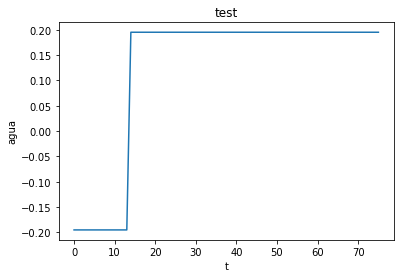

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


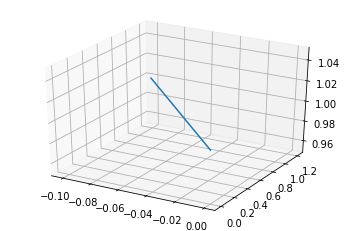

In [ ]:
from numpy import sin, cos, array, arange, rad2deg, deg2rad, sign, polyfit, polyval, arctan, ones
from math import sqrt,pi
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

def grafica(x,y,ylabel):
  plt.plot(x,y)
  plt.xlabel('t')
  plt.ylabel(ylabel)
  plt.title('test')
  plt.show()

def grafica3d(x,y):
  # Creamos la figura
  fig = plt.figure()

  # Agrrgamos un plano 3D
  ax1 = fig.add_subplot(111,projection='3d')
  z = ones((1, len(x)))
  # plot_wireframe nos permite agregar los datos x, y, z. Por ello 3D
  # Es necesario que los datos esten contenidos en un array bi-dimensional
  ax1.plot_wireframe(x, y, z)

  # Mostramos el gráfico
  plt.show()

r = 0.0975
l = (0.33/2)
w1 = 2
w2 = 2
deltaT = 0.1
xd = 0
yd = 1.2

flag = 0


signo = sign(yd)

yd = abs(yd)

if xd == 0 and (yd > 0) :
  angulo = deg2rad(90)
elif xd < 0 and yd == 0:
    xd = abs(xd)
    angulo = deg2rad(180)
    flag = 1
else:
  angulo = abs(arctan(yd/xd))
  if angulo < 0:
      angulo = angulo *-1
print(angulo)


# Er = r * 1/2 *  array([[1, 1],[0, 0],[-1/l, 1/l]]) @ array([[w1],[w2]])
# print(Er)
# Er = array([[4],[0],[1]])
# dEr = Er*deltaT

Ei = array([[0],[0],[deg2rad(0)]])

# theta = Ei[2].item()
# Rz = array([[cos(theta),-sin(theta),0],[sin(theta),cos(theta),0],[0,0,1]])

# dEi = Rz@dEr

error1 = 1
error2 = 1
Ex = []
Ey = []
v = []
condiciion = True
while condiciion:
# for i in range(10):
    if (error1 >= 0.0) and (error2 >= 0.0):

        if ((angulo > 0) and (Ei[2].item() < angulo)):
            # if signo == 1:
            #     w1 = -2
            #     w2 = 2
            # else:
            #     w1 = 2
            #     w2 = -2
            w1 = -2
            w2 = 2

        else:
            w1 = 2
            w2 = 2

        Err = (r*0.5) *  (array([[1, 1],[0, 0],[(-1/l), 1/l]]) @ array([[w1],[w2]]))
        dErr = Err*deltaT

        theta = Ei[2].item()
        Rz = array([[cos(theta),-sin(theta),0],[sin(theta),cos(theta),0],[0,0,1]])
        dEi = Rz@dErr
        Ei = Ei + dEi
        x = Ei[0].item()
        Ex.append(Ei[0].item())
        Ey.append(Ei[1].item())
        v1 = r*w1
        v.append(v1)
        if flag == 1:
          x = abs(x)
        error1 = xd - x
        error2 = yd - Ei[1].item()

        # print(error1)
        # print(w1)
        # print(len(v))
    else:
      condiciion= False
t = arange(0,len(v))
grafica(t,v,'agua')
grafica3d(Ex,Ey)

[(-10, -10), (-9, -10), (-8, -10), (-7, -10), (-6, -10), (-5, -10), (-4, -10), (-3, -10), (-2, -10), (-1, -10), (0, -10), (1, -10), (2, -10), (3, -10), (4, -10), (5, -10), (6, -10), (7, -10), (8, -10), (9, -10), (10, -10), (11, -10), (12, -10), (13, -10), (14, -10), (15, -10), (16, -10), (17, -10), (18, -10), (19, -10), (20, -10), (21, -10), (22, -10), (23, -10), (24, -10), (25, -10), (26, -10), (27, -10), (28, -10), (29, -10), (30, -10), (31, -10), (32, -10), (33, -10), (34, -10), (35, -10), (36, -10), (37, -10), (38, -10), (39, -10), (40, -10), (41, -10), (42, -10), (43, -10), (44, -10), (45, -10), (46, -10), (47, -10), (48, -10), (49, -10), (50, -10), (51, -10), (52, -10), (53, -10), (54, -10), (55, -10), (56, -10), (57, -10), (58, -10), (59, -10), (60, -10), (60, -9), (60, -8), (60, -7), (60, -6), (60, -5), (60, -4), (60, -3), (60, -2), (60, -1), (60, 0), (60, 1), (60, 2), (60, 3), (60, 4), (60, 5), (60, 6), (60, 7), (60, 8), (60, 9), (60, 10), (60, 11), (60, 12), (60, 13), (60, 14

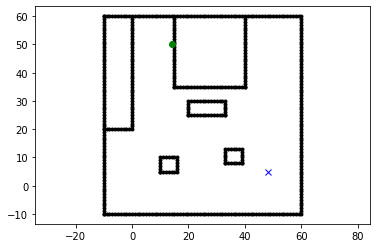

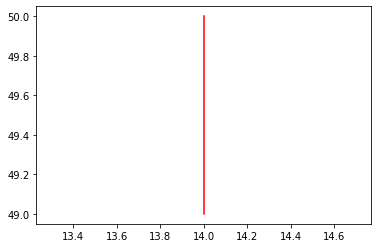

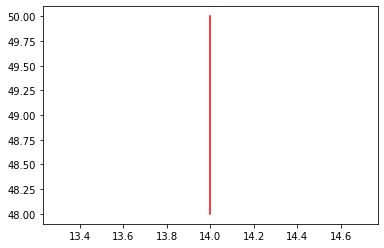

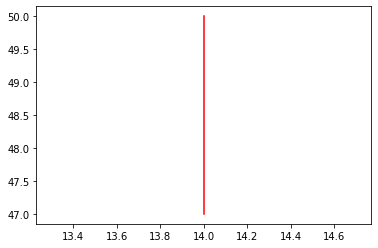

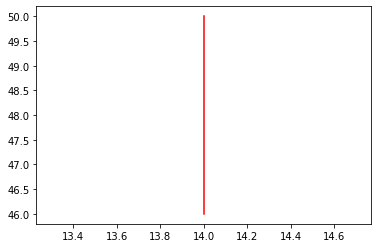

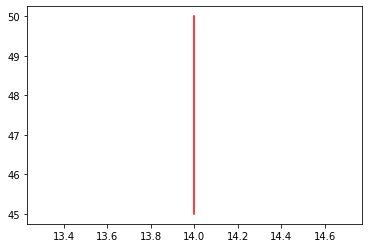

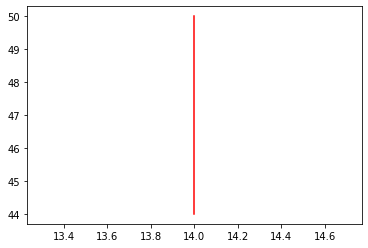

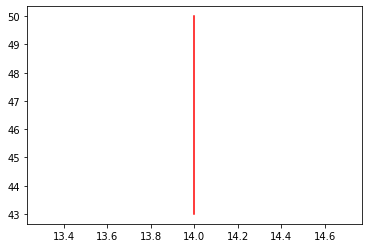

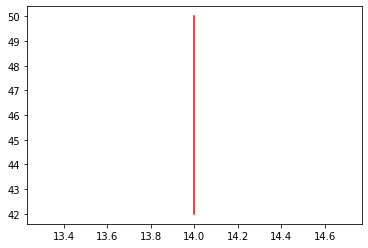

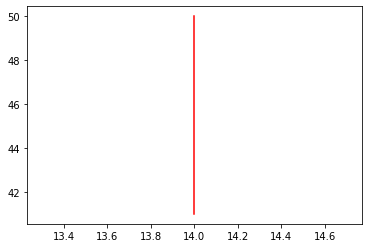

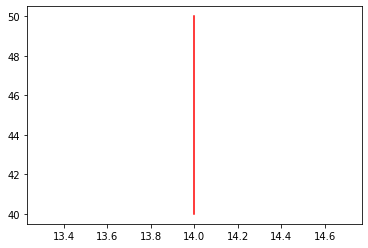

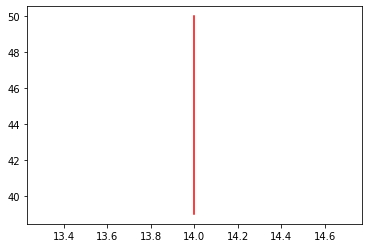

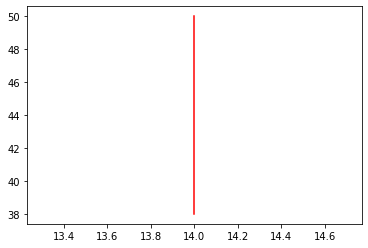

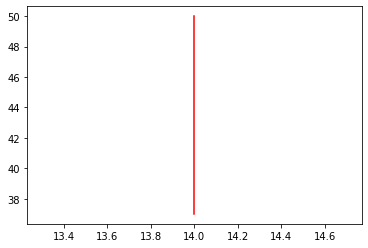

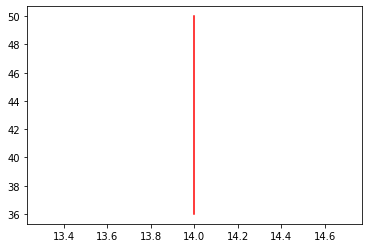

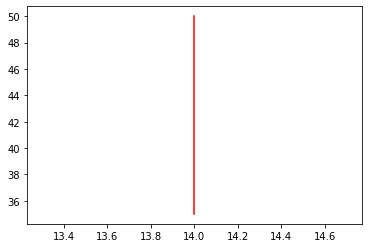

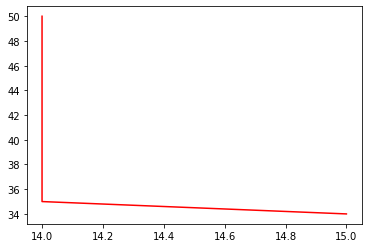

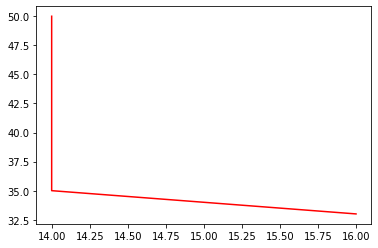

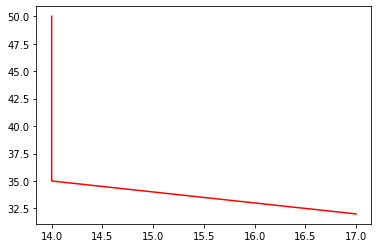

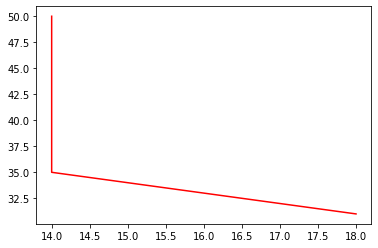

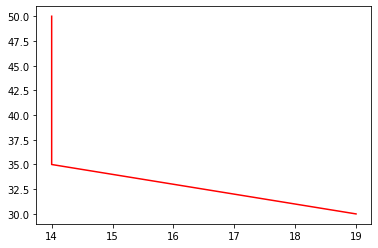

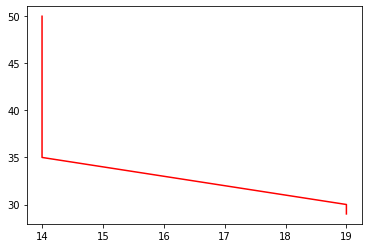

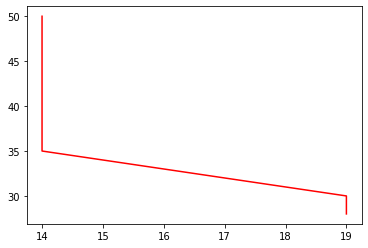

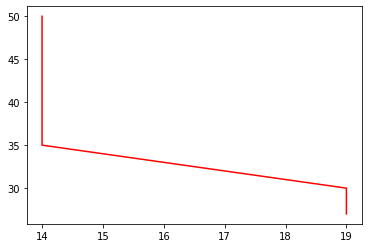

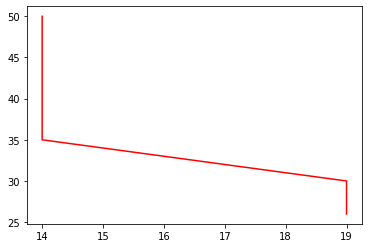

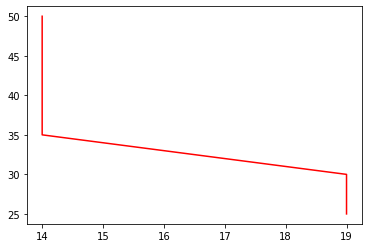

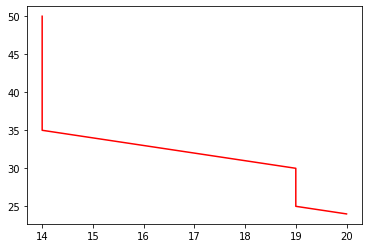

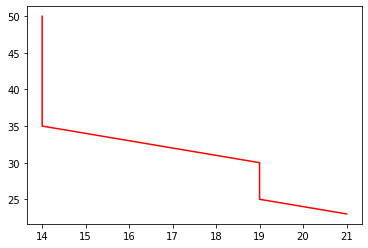

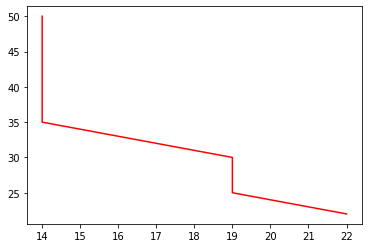

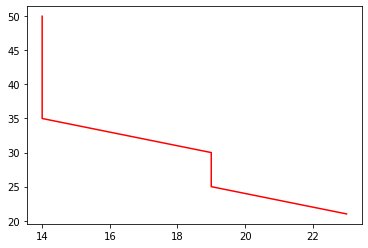

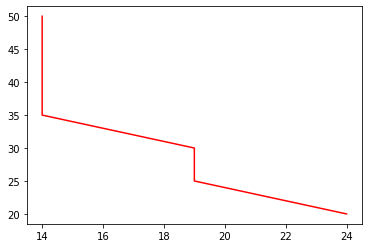

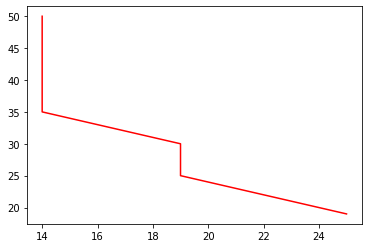

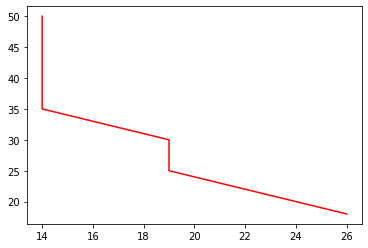

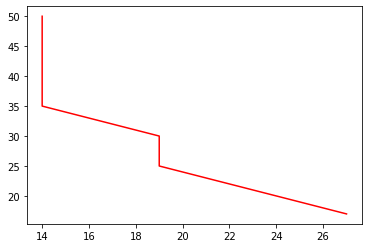

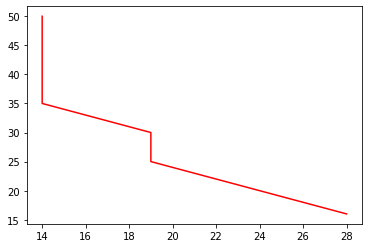

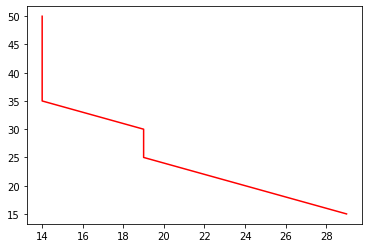

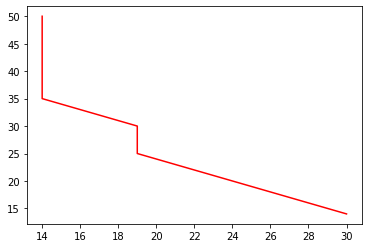

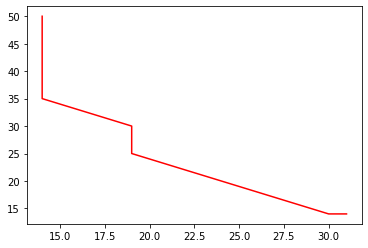

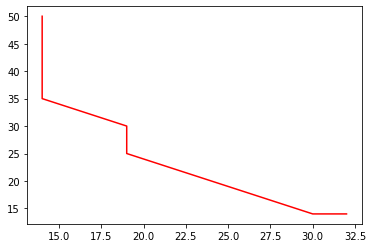

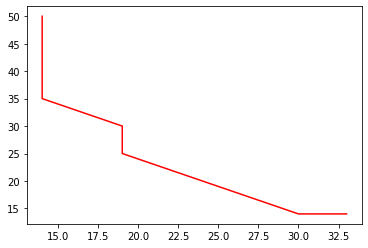

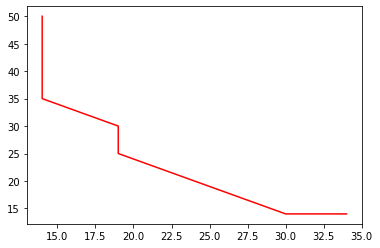

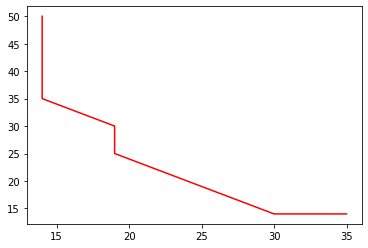

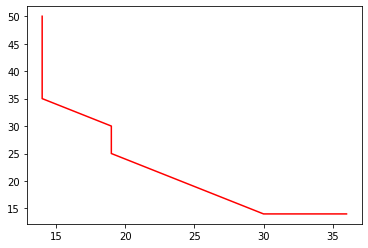

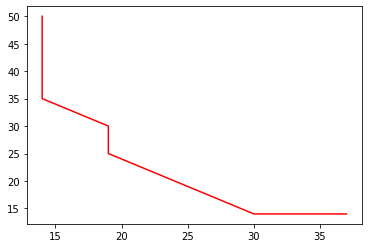

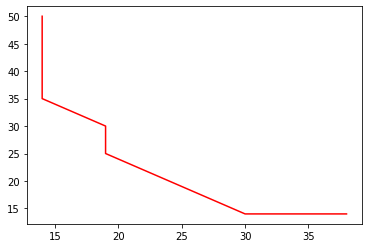

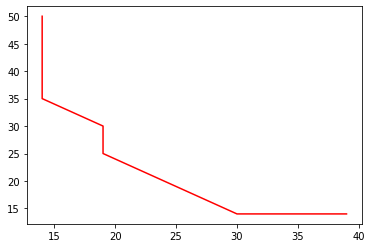

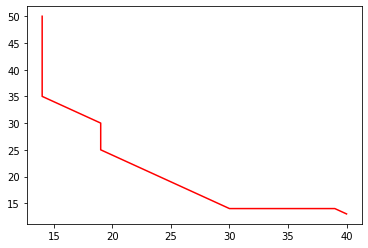

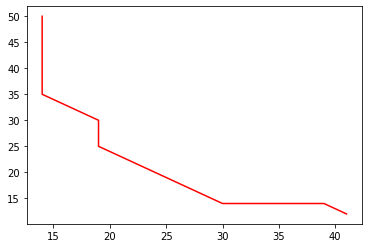

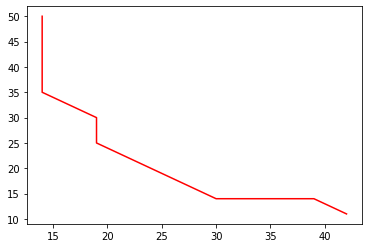

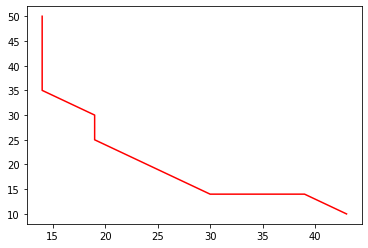

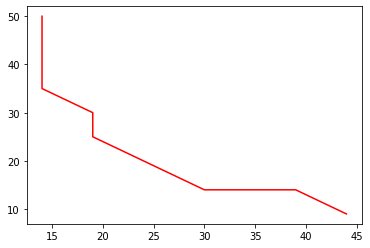

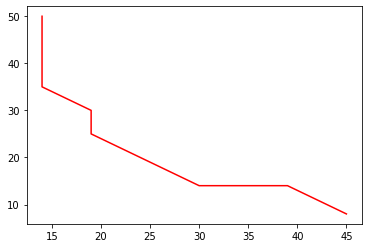

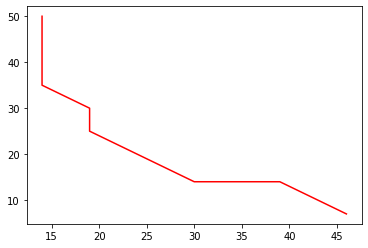

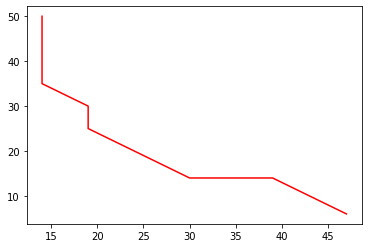

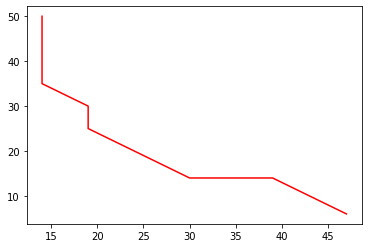

In [ ]:
import math

from sys import maxsize

import matplotlib.pyplot as plt

show_animation = True


class State:

    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.parent = None
        self.state = "."
        self.t = "new"  # tag for state
        self.h = 0
        self.k = 0

    def cost(self, state):
        if self.state == "#" or state.state == "#":
            return maxsize

        return math.sqrt(math.pow((self.x - state.x), 2) +
                         math.pow((self.y - state.y), 2))

    def set_state(self, state):
        """
        .: new
        #: obstacle
        e: oparent of current state
        *: closed state
        s: current state
        """
        if state not in ["s", ".", "#", "e", "*"]:
            return
        self.state = state


class Map:

    def __init__(self, row, col):
        self.row = row
        self.col = col
        self.map = self.init_map()

    def init_map(self):
        map_list = []
        for i in range(self.row):
            tmp = []
            for j in range(self.col):
                tmp.append(State(i, j))
            map_list.append(tmp)
        return map_list

    def get_neighbors(self, state):
        state_list = []
        for i in [-1, 0, 1]:
            for j in [-1, 0, 1]:
                if i == 0 and j == 0:
                    continue
                if state.x + i < 0 or state.x + i >= self.row:
                    continue
                if state.y + j < 0 or state.y + j >= self.col:
                    continue
                state_list.append(self.map[state.x + i][state.y + j])
        return state_list

    def set_obstacle(self, point_list):
        for x, y in point_list:
            if x < 0 or x >= self.row or y < 0 or y >= self.col:
                continue

            self.map[x][y].set_state("#")


class Dstar:
    def __init__(self, maps):
        self.map = maps
        self.open_list = set()

    def process_state(self):
        x = self.min_state()

        if x is None:
            return -1

        k_old = self.get_kmin()
        self.remove(x)

        if k_old < x.h:
            for y in self.map.get_neighbors(x):
                if y.h <= k_old and x.h > y.h + x.cost(y):
                    x.parent = y
                    x.h = y.h + x.cost(y)
        elif k_old == x.h:
            for y in self.map.get_neighbors(x):
                if y.t == "new" or y.parent == x and y.h != x.h + x.cost(y) \
                        or y.parent != x and y.h > x.h + x.cost(y):
                    y.parent = x
                    self.insert(y, x.h + x.cost(y))
        else:
            for y in self.map.get_neighbors(x):
                if y.t == "new" or y.parent == x and y.h != x.h + x.cost(y):
                    y.parent = x
                    self.insert(y, x.h + x.cost(y))
                else:
                    if y.parent != x and y.h > x.h + x.cost(y):
                        self.insert(y, x.h)
                    else:
                        if y.parent != x and x.h > y.h + x.cost(y) \
                                and y.t == "close" and y.h > k_old:
                            self.insert(y, y.h)
        return self.get_kmin()

    def min_state(self):
        if not self.open_list:
            return None
        min_state = min(self.open_list, key=lambda x: x.k)
        return min_state

    def get_kmin(self):
        if not self.open_list:
            return -1
        k_min = min([x.k for x in self.open_list])
        return k_min

    def insert(self, state, h_new):
        if state.t == "new":
            state.k = h_new
        elif state.t == "open":
            state.k = min(state.k, h_new)
        elif state.t == "close":
            state.k = min(state.h, h_new)
        state.h = h_new
        state.t = "open"
        self.open_list.add(state)

    def remove(self, state):
        if state.t == "open":
            state.t = "close"
        self.open_list.remove(state)

    def modify_cost(self, x):
        if x.t == "close":
            self.insert(x, x.parent.h + x.cost(x.parent))

    def run(self, start, end):

        rx = []
        ry = []

        self.open_list.add(end)

        while True:
            self.process_state()
            if start.t == "close":
                break

        start.set_state("s")
        s = start
        s = s.parent
        s.set_state("e")
        tmp = start

        while tmp != end:
            tmp.set_state("*")
            rx.append(tmp.x)
            ry.append(tmp.y)
            if show_animation:
                plt.plot(rx, ry, "-r")
                plt.pause(0.01)
            if tmp.parent.state == "#":
                self.modify(tmp)
                continue
            tmp = tmp.parent
        tmp.set_state("e")

        return rx, ry

    def modify(self, state):
        self.modify_cost(state)
        while True:
            k_min = self.process_state()
            if k_min >= state.h:
                break


def main():
    m = Map(100, 100)
    ox, oy = [], []
    # for i in range(-10, 60):
    #     ox.append(i)
    #     oy.append(-10)
    # for i in range(-10, 60):
    #     ox.append(60)
    #     oy.append(i)
    # for i in range(-10, 61):
    #     ox.append(i)
    #     oy.append(60)
    # for i in range(-10, 61):
    #     ox.append(-10)
    #     oy.append(i)
    # # for i in range(-10, 40):
    # #     ox.append(20)
    # #     oy.append(i)
    # # for i in range(0, 40):
    # #     ox.append(40)
    # #     oy.append(60 - i)
    # for i in range(0, 40):#CAMA
    #     ox.append(40)
    #     oy.append(60 - i)
    # for i in range(0, 40):#CAMA
    #     ox.append(15)
    #     oy.append(60 - i)
    # for i in range(15, 41):#CAMA
    #     ox.append(i)
    #     oy.append(20)


    for i in range(-10, 60):
        ox.append(i)
        oy.append(-10)
    for i in range(-10, 60):
        ox.append(60)
        oy.append(i)
    for i in range(-10, 61):
        ox.append(i)
        oy.append(60)
    for i in range(-10, 61):
        ox.append(-10)
        oy.append(i)
    # for i in range(-10, 40):
    #     ox.append(20)
    #     oy.append(i)
    for i in range(35, 60):#CAMA
        ox.append(40)
        oy.append(i)
    for i in range(35, 60):#CAMA
        ox.append(15)
        oy.append(i)
    for i in range(15, 41):#CAMA
        ox.append(i)
        oy.append(35)

    for i in range(10, 17):#OBST2_cajapequeña
        ox.append(i)
        oy.append(10)
    for i in range(10, 16):#OBST2
        ox.append(i)
        oy.append(5)
    for i in range(5, 10):#OBST2
        ox.append(10)
        oy.append(i)
    for i in range(5, 10):#OBST2
        ox.append(16)
        oy.append(i)


    for i in range(20, 34):#OBST3-cajalarga
        ox.append(i)
        oy.append(30)
    for i in range(20, 34):#OBST3
        ox.append(i)
        oy.append(25)
    for i in range(25, 30):#OBST3
        ox.append(20)
        oy.append(i)
    for i in range(25, 30):#OBST3
        ox.append(33)
        oy.append(i)

    for i in range(-10, 0):#OBST4-aramrio
        ox.append(i)
        oy.append(20)
    for i in range(20, 60):#OBST4
        ox.append(0)
        oy.append(i)

    for i in range(33, 40):#OBST5_cajapequeña2
        ox.append(i)
        oy.append(13)
    for i in range(33, 40):#OBST5
        ox.append(i)
        oy.append(8)
    for i in range(8, 13):#OBST5
        ox.append(33)
        oy.append(i)
    for i in range(8, 13):#OBST5
        ox.append(39)
        oy.append(i)
    print([(i, j) for i, j in zip(ox, oy)])
    m.set_obstacle([(i, j) for i, j in zip(ox, oy)])

    start = [14, 50] #scara
    goal = [48, 5] #antro
    # goal = [14, 50] #scara
    # start = [50, 0] #antro
    # start = [10, 10]
    # goal = [50, 50]
    if show_animation:
        plt.plot(ox, oy, ".k")
        plt.plot(start[0], start[1], "og")
        plt.plot(goal[0], goal[1], "xb")
        plt.axis("equal")

    start = m.map[start[0]][start[1]]
    end = m.map[goal[0]][goal[1]]
    dstar = Dstar(m)
    rx, ry = dstar.run(start, end)

    if show_animation:
        plt.plot(rx, ry, "-r")
        plt.show()


if __name__ == '__main__':
    main()

[(-10, -10), (-9, -10), (-8, -10), (-7, -10), (-6, -10), (-5, -10), (-4, -10), (-3, -10), (-2, -10), (-1, -10), (0, -10), (1, -10), (2, -10), (3, -10), (4, -10), (5, -10), (6, -10), (7, -10), (8, -10), (9, -10), (10, -10), (11, -10), (12, -10), (13, -10), (14, -10), (15, -10), (16, -10), (17, -10), (18, -10), (19, -10), (20, -10), (21, -10), (22, -10), (23, -10), (24, -10), (25, -10), (26, -10), (27, -10), (28, -10), (29, -10), (30, -10), (31, -10), (32, -10), (33, -10), (34, -10), (35, -10), (36, -10), (37, -10), (38, -10), (39, -10), (40, -10), (41, -10), (42, -10), (43, -10), (44, -10), (45, -10), (46, -10), (47, -10), (48, -10), (49, -10), (50, -10), (51, -10), (52, -10), (53, -10), (54, -10), (55, -10), (56, -10), (57, -10), (58, -10), (59, -10), (60, -10), (60, -9), (60, -8), (60, -7), (60, -6), (60, -5), (60, -4), (60, -3), (60, -2), (60, -1), (60, 0), (60, 1), (60, 2), (60, 3), (60, 4), (60, 5), (60, 6), (60, 7), (60, 8), (60, 9), (60, 10), (60, 11), (60, 12), (60, 13), (60, 14

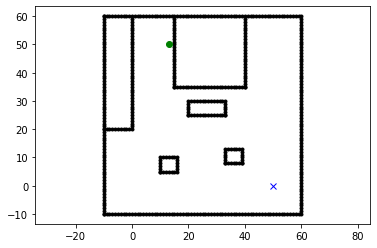

In [ ]:
import math

from sys import maxsize

import matplotlib.pyplot as plt

show_animation = True

class State:

    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.parent = None
        self.state = "."
        self.t = "new"  # tag for state
        self.h = 0
        self.k = 0

    def cost(self, state):
        if self.state == "#" or state.state == "#":
            return maxsize

        return math.sqrt(math.pow((self.x - state.x), 2) +
                         math.pow((self.y - state.y), 2))

    def set_state(self, state):
        """
        .: new
        #: obstacle
        e: oparent of current state
        *: closed state
        s: current state
        """
        if state not in ["s", ".", "#", "e", "*"]:
            return
        self.state = state

class Map:

    def __init__(self, row, col):
        self.row = row
        self.col = col
        self.map = self.init_map()

    def init_map(self):
        map_list = []
        for i in range(self.row):
            tmp = []
            for j in range(self.col):
                tmp.append(State(i, j))
            map_list.append(tmp)
        return map_list

    def get_neighbors(self, state):
        state_list = []
        for i in [-1, 0, 1]:
            for j in [-1, 0, 1]:
                if i == 0 and j == 0:
                    continue
                if state.x + i < 0 or state.x + i >= self.row:
                    continue
                if state.y + j < 0 or state.y + j >= self.col:
                    continue
                state_list.append(self.map[state.x + i][state.y + j])
        return state_list

    def set_obstacle(self, point_list):
        for x, y in point_list:
            if x < 0 or x >= self.row or y < 0 or y >= self.col:
                continue

def main():
    m = Map(100, 100)
    ox, oy = [], []
    for i in range(-10, 60):
        ox.append(i)
        oy.append(-10)
    for i in range(-10, 60):
        ox.append(60)
        oy.append(i)
    for i in range(-10, 61):
        ox.append(i)
        oy.append(60)
    for i in range(-10, 61):
        ox.append(-10)
        oy.append(i)
    # for i in range(-10, 40):
    #     ox.append(20)
    #     oy.append(i)
    for i in range(35, 60):#CAMA
        ox.append(40)
        oy.append(i)
    for i in range(35, 60):#CAMA
        ox.append(15)
        oy.append(i)
    for i in range(15, 41):#CAMA
        ox.append(i)
        oy.append(35)

    for i in range(10, 17):#OBST2_cajapequeña
        ox.append(i)
        oy.append(10)
    for i in range(10, 16):#OBST2
        ox.append(i)
        oy.append(5)
    for i in range(5, 10):#OBST2
        ox.append(10)
        oy.append(i)
    for i in range(5, 10):#OBST2
        ox.append(16)
        oy.append(i)


    for i in range(20, 34):#OBST3-cajalarga
        ox.append(i)
        oy.append(30)
    for i in range(20, 34):#OBST3
        ox.append(i)
        oy.append(25)
    for i in range(25, 30):#OBST3
        ox.append(20)
        oy.append(i)
    for i in range(25, 30):#OBST3
        ox.append(33)
        oy.append(i)

    for i in range(-10, 0):#OBST4-aramrio
        ox.append(i)
        oy.append(20)
    for i in range(20, 60):#OBST4
        ox.append(0)
        oy.append(i)

    for i in range(33, 40):#OBST5_cajapequeña2
        ox.append(i)
        oy.append(13)
    for i in range(33, 40):#OBST5
        ox.append(i)
        oy.append(8)
    for i in range(8, 13):#OBST5
        ox.append(33)
        oy.append(i)
    for i in range(8, 13):#OBST5
        ox.append(39)
        oy.append(i)

    print([(i, j) for i, j in zip(ox, oy)])
    m.set_obstacle([(i, j) for i, j in zip(ox, oy)])

    start = [13, 50]
    goal = [50, 0]
    if show_animation:
        plt.plot(ox, oy, ".k")
        plt.plot(start[0], start[1], "og")
        plt.plot(goal[0], goal[1], "xb")
        plt.axis("equal")

    # start = m.map[start[0]][start[1]]
    # end = m.map[goal[0]][goal[1]]
    # dstar = Dstar(m)
    # rx, ry = dstar.run(start, end)

    # if show_animation:
    #     plt.plot(rx, ry, "-r")
    #     plt.show()


if __name__ == '__main__':
    main()


